In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.datasets import make_classification

from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  

In [2]:
# Reading the dataset

df_SMTP = pd.read_csv("Social Media Data for DSBA.csv")
df_SMTP.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6


In [3]:
df_SMTP.shape

(11760, 17)

In [4]:
df_SMTP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [5]:
df_SMTP.describe()

,UserID,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
count,1.176000e+04,11179.000000,11379.000000,11554.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000
mean,1.005880e+06,280.830844,28170.481765,74.790029,6531.699065,3.203571,28.661565,2.712245,0.793878,13.817432
std,3.394964e+03,68.182958,14385.032134,24.026650,4706.613785,2.616365,48.660504,1.080887,0.851823,9.070657
min,1.000001e+06,35.000000,3570.000000,3.000000,1009.000000,0.000000,11.000000,1.000000,0.000000,0.000000
25%,1.002941e+06,232.000000,16380.000000,57.000000,2940.750000,1.000000,17.000000,2.000000,0.000000,8.000000
50%,1.005880e+06,271.000000,28076.000000,75.000000,4948.000000,3.000000,22.000000,3.000000,1.000000,12.000000
75%,1.008820e+06,324.000000,40525.000000,92.000000,8393.250000,5.000000,27.000000,4.000000,1.000000,18.000000
max,1.011760e+06,464.000000,252430.000000,815.000000,20065.000000,11.000000,500.000000,4.000000,3.000000,270.000000


In [6]:
df_SMTP.describe(include='object')

,Taken_product,preferred_device,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,following_company_page,working_flag
count,11760,11707,11685,11760,11729,11657,11760
unique,2,10,30,7,15,4,2
top,No,Tab,1,3,Beach,No,No
freq,9864,4172,4543,4561,2424,8355,9952


In [7]:
# Analysing the unique value, count of unique value and type of values
# Separating the numeric and categorical variables

In [8]:
cat = list(df_SMTP.dtypes[df_SMTP.dtypes == 'object'].index) # Separating out the categorical variables
num = list(df_SMTP.dtypes[df_SMTP.dtypes != 'object'].index) # Separating out the numerical variables

In [9]:
cat

['Taken_product',
 'preferred_device',
 'yearly_avg_Outstation_checkins',
 'member_in_family',
 'preferred_location_type',
 'following_company_page',
 'working_flag']

In [10]:
num

['UserID',
 'Yearly_avg_view_on_travel_page',
 'total_likes_on_outstation_checkin_given',
 'Yearly_avg_comment_on_travel_page',
 'total_likes_on_outofstation_checkin_received',
 'week_since_last_outstation_checkin',
 'montly_avg_comment_on_company_page',
 'travelling_network_rating',
 'Adult_flag',
 'Daily_Avg_mins_spend_on_traveling_page']

In [11]:
# Analying value of numerical variable

unique_counts = []
for col in num:
    unique_counts.append((col, df_SMTP[col].nunique()))
unique_counts = sorted(unique_counts, key=lambda x: x[1],reverse = True)
print("No of unique values in each column are as follows:(In Descending order)\n")
for col,nunique in unique_counts:
    print(f"{col}: {nunique}: {round(nunique/11760*100,2)}%")

No of unique values in each column are as follows:(In Descending order)

UserID: 11760: 100.0%
total_likes_on_outstation_checkin_given: 7888: 67.07%
total_likes_on_outofstation_checkin_received: 6288: 53.47%
Yearly_avg_view_on_travel_page: 331: 2.81%
montly_avg_comment_on_company_page: 160: 1.36%
Yearly_avg_comment_on_travel_page: 100: 0.85%
Daily_Avg_mins_spend_on_traveling_page: 52: 0.44%
week_since_last_outstation_checkin: 12: 0.1%
travelling_network_rating: 4: 0.03%
Adult_flag: 4: 0.03%


In [12]:
# Unique values of numerical variables
for i in num:
    print(i)
    print(df_SMTP[i].unique())
    print()

UserID
[1000001 1000002 1000003 ... 1011758 1011759 1011760]

Yearly_avg_view_on_travel_page
[307. 367. 277. 247. 202. 240.  nan 225. 285. 270. 262. 217. 232. 255.
 210. 165. 397. 180. 157. 330. 345. 292. 322. 375. 195. 360. 412. 382.
 300. 405. 435. 150. 187.  42. 427. 352.  35. 450. 135. 308. 368. 249.
 205. 445. 226. 287. 271. 263. 219. 234. 256. 212. 241. 399. 286. 182.
 159. 316. 332. 347. 248. 331. 294. 323. 376. 265. 204. 309. 257. 346.
 264. 361. 196. 278. 444. 272. 414. 339. 443. 233. 280. 422. 174. 384.
 302. 242. 181. 211. 436. 279. 151. 377. 188. 189. 166. 406. 324. 197.
 143. 167. 383. 227. 144. 301. 429. 203. 250. 413. 338. 310. 392. 317.
 354. 400. 369. 137. 136. 295. 391. 353. 218. 362. 428. 451. 430. 173.
 190. 398. 355. 437. 407. 152. 421. 158. 293. 235. 220. 340. 385. 370.
 325. 415. 452. 315. 379. 290. 231. 281. 269. 222. 244. 221. 246. 402.
 184. 276. 258. 168. 259. 404. 318. 333. 252. 304. 378. 273. 282. 253.
 199. 215. 228. 356. 268. 366. 335. 266. 254. 274. 291.

In [13]:
# We see Adult_flag column has multiple values, we can standardize it

df_SMTP['Adult_flag'] = np.where(df_SMTP['Adult_flag']>0, 'Adult','Minor')

In [14]:
df_SMTP['Adult_flag'].unique()

array(['Minor', 'Adult'], dtype=object)

In [15]:
# Analying value of categorical variable

unique_counts_cat = []
for col1 in cat:
    unique_counts_cat.append((col1, df_SMTP[col1].nunique()))
unique_counts_cat = sorted(unique_counts_cat, key=lambda x: x[1],reverse = True)
print("No of unique values in each column are as follows:(In Descending order)\n")
for col1,nunique in unique_counts_cat:
    print(f"{col1}: {nunique}: {round(nunique/11760*100,2)}%")

No of unique values in each column are as follows:(In Descending order)

yearly_avg_Outstation_checkins: 30: 0.26%
preferred_location_type: 15: 0.13%
preferred_device: 10: 0.09%
member_in_family: 7: 0.06%
following_company_page: 4: 0.03%
Taken_product: 2: 0.02%
working_flag: 2: 0.02%


In [16]:
# Unique values of categorical variables
for i in cat:
    print(i)
    print(df_SMTP[i].unique())
    print()

Taken_product
['Yes' 'No']

preferred_device
['iOS and Android' 'iOS' 'ANDROID' nan 'Android' 'Android OS' 'Other'
 'Others' 'Tab' 'Laptop' 'Mobile']

yearly_avg_Outstation_checkins
['1' '24' '23' '27' '16' '15' '26' '19' '21' '11' '10' '25' '12' '18' '29'
 nan '22' '14' '20' '28' '17' '13' '*' '5' '8' '2' '3' '9' '7' '6' '4']

member_in_family
['2' '1' '4' 'Three' '3' '5' '10']

preferred_location_type
['Financial' 'Other' 'Medical' nan 'Game' 'Social media' 'Entertainment'
 'Tour and Travel' 'Movie' 'OTT' 'Tour  Travel' 'Beach' 'Historical site'
 'Big Cities' 'Trekking' 'Hill Stations']

following_company_page
['Yes' 'No' nan '1' '0']

working_flag
['No' 'Yes']



In [17]:
# Standardizing the preferred device variable

df_SMTP['preferred_device'].replace(to_replace=['ANDROID','Android','Android OS'], value = 'Android',inplace=True) 

df_SMTP['preferred_device'].replace(to_replace=['Other','Others'], value = 'Other',inplace=True) 

In [18]:
df_SMTP['preferred_device'].unique()

array(['iOS and Android', 'iOS', 'Android', nan, 'Other', 'Tab', 'Laptop',
       'Mobile'], dtype=object)

In [19]:
# The variable yearly_avg_Outstation_checkins should be numeric

df_SMTP['yearly_avg_Outstation_checkins'] = df_SMTP['yearly_avg_Outstation_checkins'].apply(lambda x: np.nan if x == '*' else x).astype('float64')

In [20]:
df_SMTP['yearly_avg_Outstation_checkins'].dtype

dtype('float64')

In [21]:
df_SMTP['yearly_avg_Outstation_checkins'].unique()

array([ 1., 24., 23., 27., 16., 15., 26., 19., 21., 11., 10., 25., 12.,
       18., 29., nan, 22., 14., 20., 28., 17., 13.,  5.,  8.,  2.,  3.,
        9.,  7.,  6.,  4.])

In [22]:
#Member in a family should be  numeric

df_SMTP['member_in_family'] = df_SMTP['member_in_family'].apply(lambda x: 3 if x == 'Three' else x).astype('float64')

In [23]:
df_SMTP['member_in_family'].dtype

dtype('float64')

In [24]:
df_SMTP['Adult_flag']=df_SMTP['Adult_flag'].astype('object')

In [25]:
# Updating following company page variable

df_SMTP['following_company_page'].replace(to_replace='1', value = 'Yes',inplace=True) 

df_SMTP['following_company_page'].replace(to_replace='0', value = 'No',inplace=True) 

In [26]:
df_SMTP['following_company_page'].unique()

array(['Yes', 'No', nan], dtype=object)

In [27]:
# Updating preferred location type


df_SMTP['preferred_location_type'].replace(to_replace=['Tour  Travel'], value = 'Tour and Travel',inplace=True) 

In [28]:
df_SMTP['preferred_location_type'].unique()

array(['Financial', 'Other', 'Medical', nan, 'Game', 'Social media',
       'Entertainment', 'Tour and Travel', 'Movie', 'OTT', 'Beach',
       'Historical site', 'Big Cities', 'Trekking', 'Hill Stations'],
      dtype=object)

In [29]:
df_SMTP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11684 non-null  float64
 6   member_in_family                              11760 non-null  float64
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [30]:
# Checking the null values

df_SMTP.isnull().sum().sort_values(ascending=False)

Yearly_avg_view_on_travel_page                  581
total_likes_on_outstation_checkin_given         381
Yearly_avg_comment_on_travel_page               206
following_company_page                          103
yearly_avg_Outstation_checkins                   76
preferred_device                                 53
preferred_location_type                          31
Adult_flag                                        0
travelling_network_rating                         0
working_flag                                      0
montly_avg_comment_on_company_page                0
UserID                                            0
week_since_last_outstation_checkin                0
total_likes_on_outofstation_checkin_received      0
Taken_product                                     0
member_in_family                                  0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [31]:
# getting percentage of missing values

round((df_SMTP.isnull().sum().sort_values(ascending=False)/len(df_SMTP)*100),2)

Yearly_avg_view_on_travel_page                  4.94
total_likes_on_outstation_checkin_given         3.24
Yearly_avg_comment_on_travel_page               1.75
following_company_page                          0.88
yearly_avg_Outstation_checkins                  0.65
preferred_device                                0.45
preferred_location_type                         0.26
Adult_flag                                      0.00
travelling_network_rating                       0.00
working_flag                                    0.00
montly_avg_comment_on_company_page              0.00
UserID                                          0.00
week_since_last_outstation_checkin              0.00
total_likes_on_outofstation_checkin_received    0.00
Taken_product                                   0.00
member_in_family                                0.00
Daily_Avg_mins_spend_on_traveling_page          0.00
dtype: float64

In [32]:
#Missing Value Analysis
def get_missing_data_details(df_SMTP):
    sns.heatmap(df_SMTP.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')
    total = df_SMTP.isnull().sum().sort_values(ascending = False)
    percent = ((df_SMTP.isnull().sum()/df_SMTP.isnull().count())*100).sort_values(ascending = False)
    missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing = missing[missing["Percent"]>0]
  
    plt.figure(figsize = (5,5))
    sns.barplot(missing["Percent"],missing.index)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percentage', fontsize=15)
    plt.title('Missing Data %', fontsize=15) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


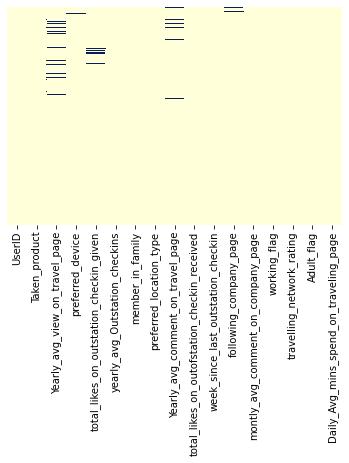

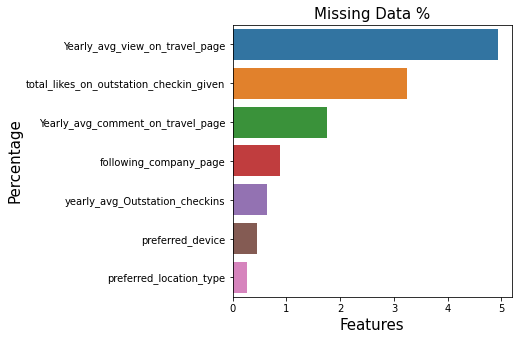

In [33]:
get_missing_data_details(df_SMTP)

In [34]:
# Imputing the null values using KNN imputer 

In [35]:
cat = list(df_SMTP.dtypes[df_SMTP.dtypes == 'object'].index) # Separating out the categorical variables
num = list(df_SMTP.dtypes[df_SMTP.dtypes != 'object'].index) # Separating out the numerical variables

In [36]:
cat

['Taken_product',
 'preferred_device',
 'preferred_location_type',
 'following_company_page',
 'working_flag',
 'Adult_flag']

In [37]:
from sklearn.impute import KNNImputer # Dynamic imputation of Missing value
imputer = KNNImputer(n_neighbors=3)
df_SMTP_num = df_SMTP[num]
df_SMTP_num = pd.DataFrame(imputer.fit_transform(df_SMTP_num),columns=list(df_SMTP_num.columns))

In [38]:
df_SMTP_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  float64
 1   Yearly_avg_view_on_travel_page                11760 non-null  float64
 2   total_likes_on_outstation_checkin_given       11760 non-null  float64
 3   yearly_avg_Outstation_checkins                11760 non-null  float64
 4   member_in_family                              11760 non-null  float64
 5   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 6   total_likes_on_outofstation_checkin_received  11760 non-null  float64
 7   week_since_last_outstation_checkin            11760 non-null  float64
 8   montly_avg_comment_on_company_page            11760 non-null  float64
 9   travelling_network_rating                     11760 non-null 

In [39]:
cat

['Taken_product',
 'preferred_device',
 'preferred_location_type',
 'following_company_page',
 'working_flag',
 'Adult_flag']

In [40]:
# imputing categorical variable using mode

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')
df_SMTP_cat = df_SMTP[cat]
df_SMTP_cat = pd.DataFrame(imputer.fit_transform(df_SMTP_cat),columns=list(df_SMTP_cat.columns))
    



In [41]:
df_SMTP_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Taken_product            11760 non-null  object
 1   preferred_device         11760 non-null  object
 2   preferred_location_type  11760 non-null  object
 3   following_company_page   11760 non-null  object
 4   working_flag             11760 non-null  object
 5   Adult_flag               11760 non-null  object
dtypes: object(6)
memory usage: 551.4+ KB


In [42]:
# Joining the 2 set of variables
df_SMTP1 = df_SMTP_cat.join(df_SMTP_num)


In [43]:
df_SMTP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  object 
 1   preferred_device                              11760 non-null  object 
 2   preferred_location_type                       11760 non-null  object 
 3   following_company_page                        11760 non-null  object 
 4   working_flag                                  11760 non-null  object 
 5   Adult_flag                                    11760 non-null  object 
 6   UserID                                        11760 non-null  float64
 7   Yearly_avg_view_on_travel_page                11760 non-null  float64
 8   total_likes_on_outstation_checkin_given       11760 non-null  float64
 9   yearly_avg_Outstation_checkins                11760 non-null 

In [44]:
# Checking the duplicate values

df_SMTP1.duplicated().sum()

0

In [45]:
# Checking the Skewness If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.

df_SMTP1.skew().sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


montly_avg_comment_on_company_page              7.684150
Yearly_avg_comment_on_travel_page               4.876038
Daily_Avg_mins_spend_on_traveling_page          4.480682
total_likes_on_outofstation_checkin_received    1.368578
yearly_avg_Outstation_checkins                  0.968533
week_since_last_outstation_checkin              0.915334
total_likes_on_outstation_checkin_given         0.487585
Yearly_avg_view_on_travel_page                  0.413356
member_in_family                                0.001205
UserID                                          0.000000
travelling_network_rating                      -0.302557
dtype: float64

In [46]:
# Univariate Analysis
df_SMTP1.head(3)

,Taken_product,preferred_device,preferred_location_type,following_company_page,working_flag,Adult_flag,UserID,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Daily_Avg_mins_spend_on_traveling_page
0,Yes,iOS and Android,Financial,Yes,No,Minor,1000001.0,307.0,38570.0,1.0,2.0,94.0,5993.0,8.0,11.0,1.0,8.0
1,No,iOS,Financial,No,Yes,Adult,1000002.0,367.0,9765.0,1.0,1.0,61.0,5130.0,1.0,23.0,4.0,10.0
2,Yes,iOS and Android,Other,Yes,No,Minor,1000003.0,277.0,48055.0,1.0,2.0,92.0,2090.0,6.0,15.0,2.0,7.0


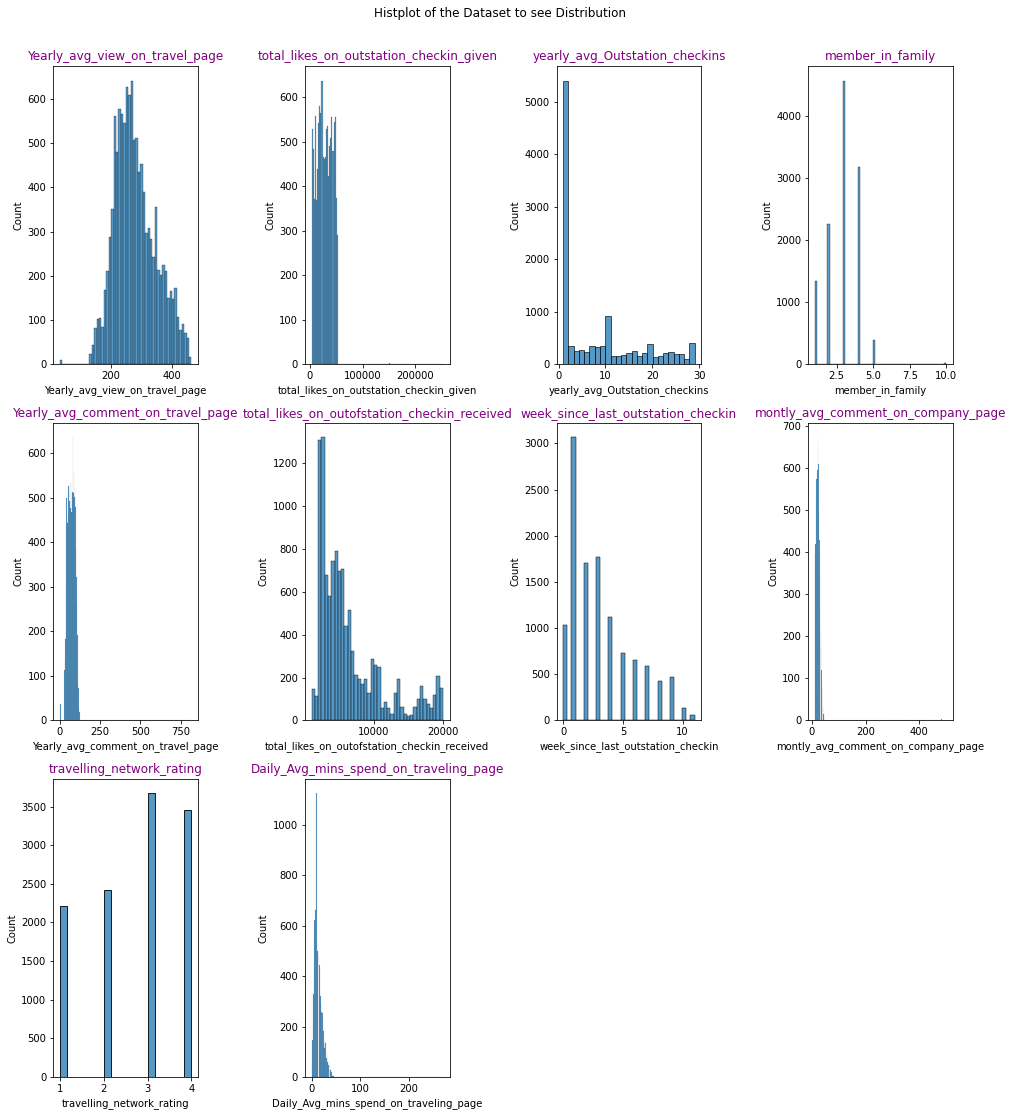

In [47]:
# Plotting Histplot to see if there are any outlier in any of the Columns
# Excluding the User ID Column
df_SMTP2 = df_SMTP1.drop('UserID', axis=1)
fig=plt.figure(figsize=(14,15))
fig.suptitle('Histplot of the Dataset to see Distribution', y=1.03)
for i in range(0,df_SMTP2.select_dtypes(exclude='object').shape[1]):
    ax=fig.add_subplot(3,4,i+1)
    sns.histplot(df_SMTP2[df_SMTP2.select_dtypes(exclude='object').columns[i]])
    ax.set_title(df_SMTP2.select_dtypes(exclude='object').columns[i], color='purple')
    
plt.tight_layout()
plt.show()

In [48]:
import warnings
warnings.filterwarnings('ignore')

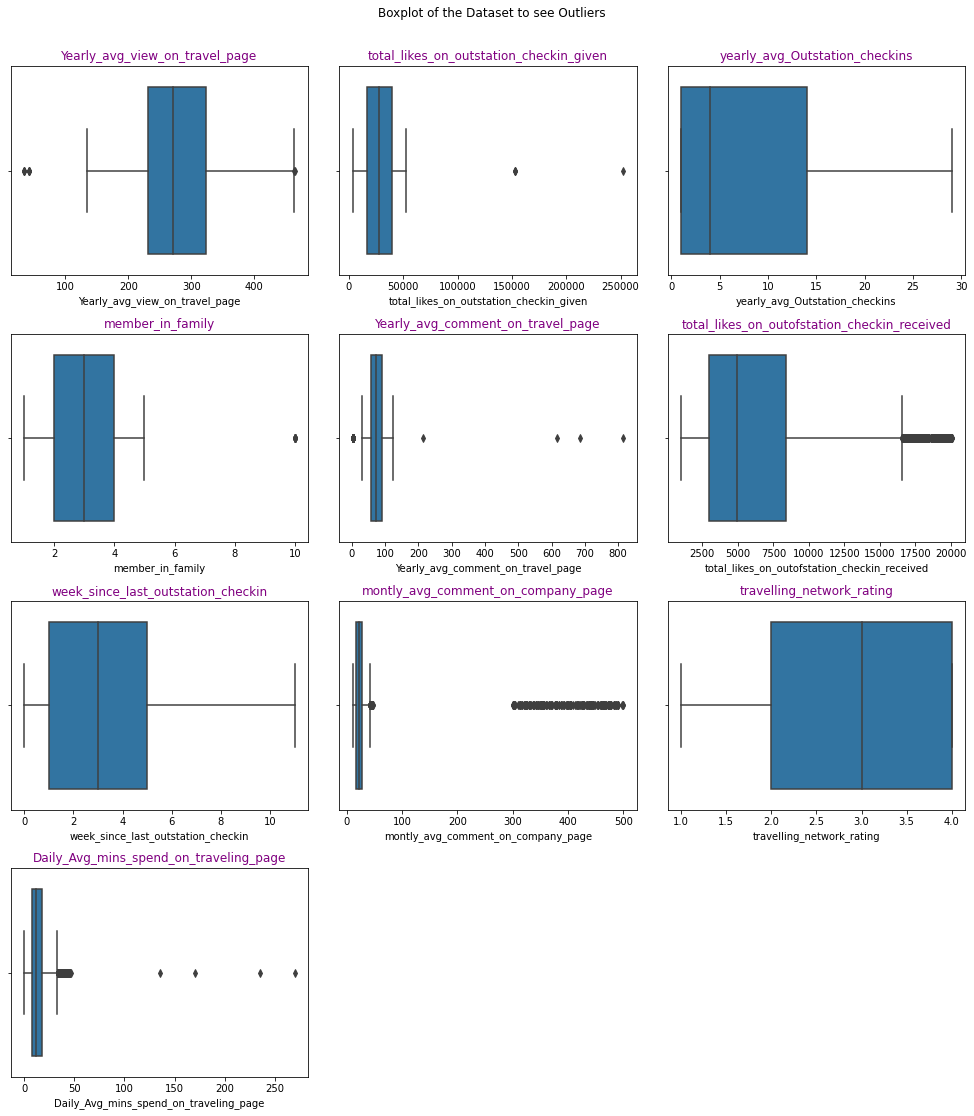

In [49]:
# Plotting Boxplot to see if there are any outlier in any of the Columns

fig=plt.figure(figsize=(14,15))
fig.suptitle('Boxplot of the Dataset to see Outliers', y=1.03)
for i in range(0,df_SMTP2.select_dtypes(exclude='object').shape[1]):
    ax=fig.add_subplot(4,3,i+1)
    sns.boxplot(df_SMTP2[df_SMTP2.select_dtypes(exclude='object').columns[i]])
    ax.set_title(df_SMTP2.select_dtypes(exclude='object').columns[i], color='purple')
    
plt.tight_layout()
plt.show()

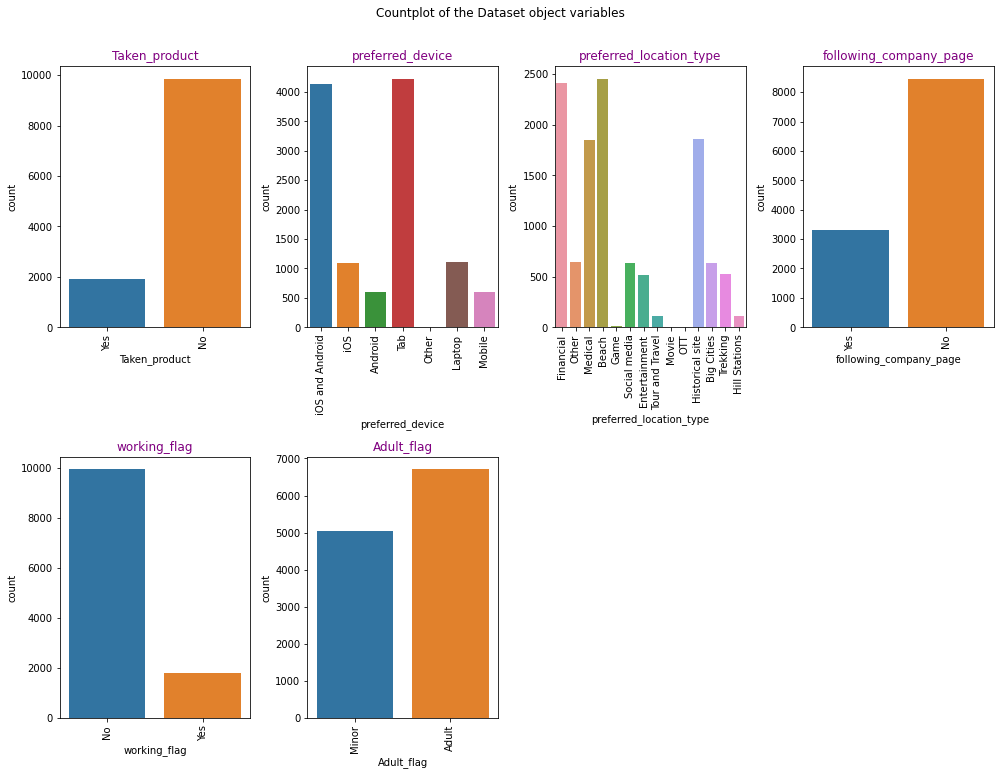

In [50]:
# Univariate analysis of the Categorical variable

fig=plt.figure(figsize=(14,15))
fig.suptitle('Countplot of the Dataset object variables', y=1.03)
for i in range(0,df_SMTP2.select_dtypes(include='object').shape[1]):
    ax=fig.add_subplot(3,4,i+1)
    sns.countplot(df_SMTP2[df_SMTP2.select_dtypes(include='object').columns[i]])
    plt.xticks(rotation=90)
    ax.set_title(df_SMTP2.select_dtypes(include='object').columns[i], color='purple')
    
plt.tight_layout()
plt.show()

In [51]:
# Bivariate analysis
# Target Variable versus the indpendent variables with object datatype

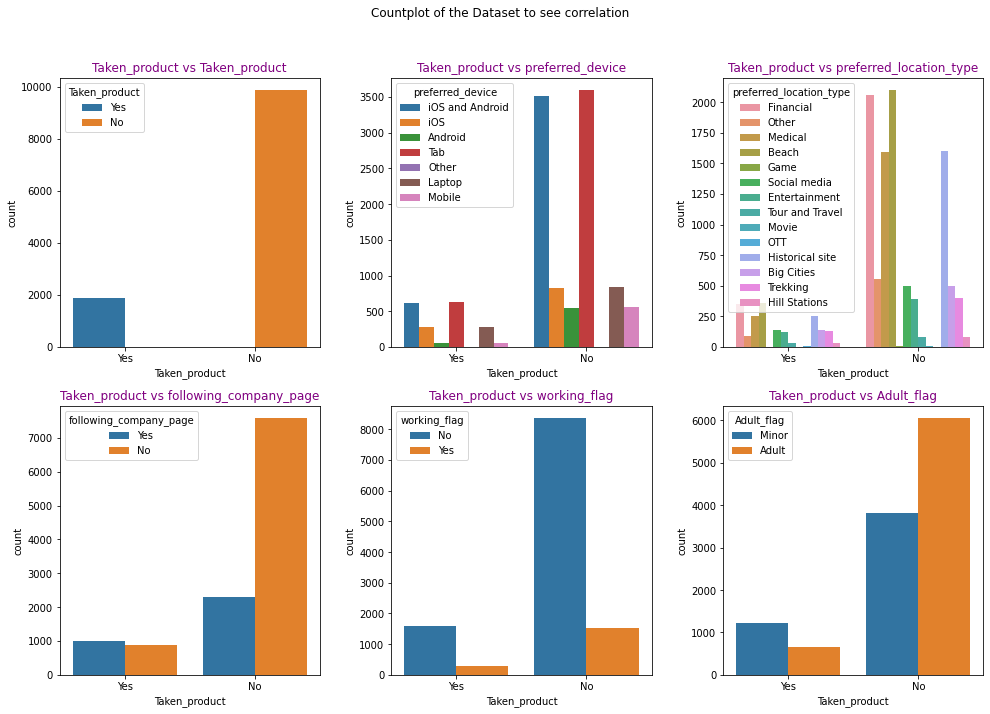

In [52]:
fig=plt.figure(figsize=(14,18))
fig.suptitle('Countplot of the Dataset to see correlation', y=1.03)
for i in range(0,df_SMTP2.select_dtypes(include='object').shape[1]):
    ax=fig.add_subplot(4,3,i+1)
    sns.countplot(x=df_SMTP2['Taken_product'], hue=df_SMTP2[df_SMTP2.select_dtypes(include='object').columns[i]], data=df_SMTP2)
    ax.set_title('Taken_product vs {}'.format(df_SMTP2.select_dtypes(include='object').columns[i]), color='purple')
    
plt.tight_layout()
plt.show()

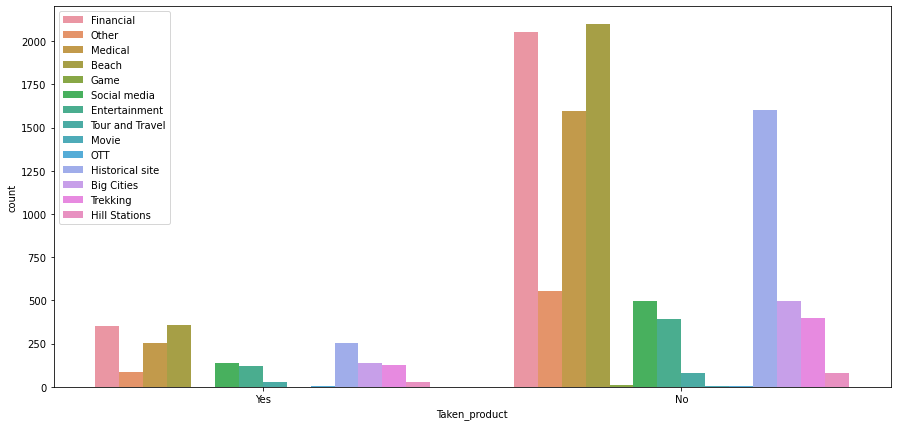

In [53]:
plt.figure(figsize=(15,7))
sns.countplot(x=df_SMTP2['Taken_product'], hue=df_SMTP2['preferred_location_type'], data=df_SMTP2)
plt.legend(loc='upper left')


In [54]:
# Boxplot of numeric variables against the target variable


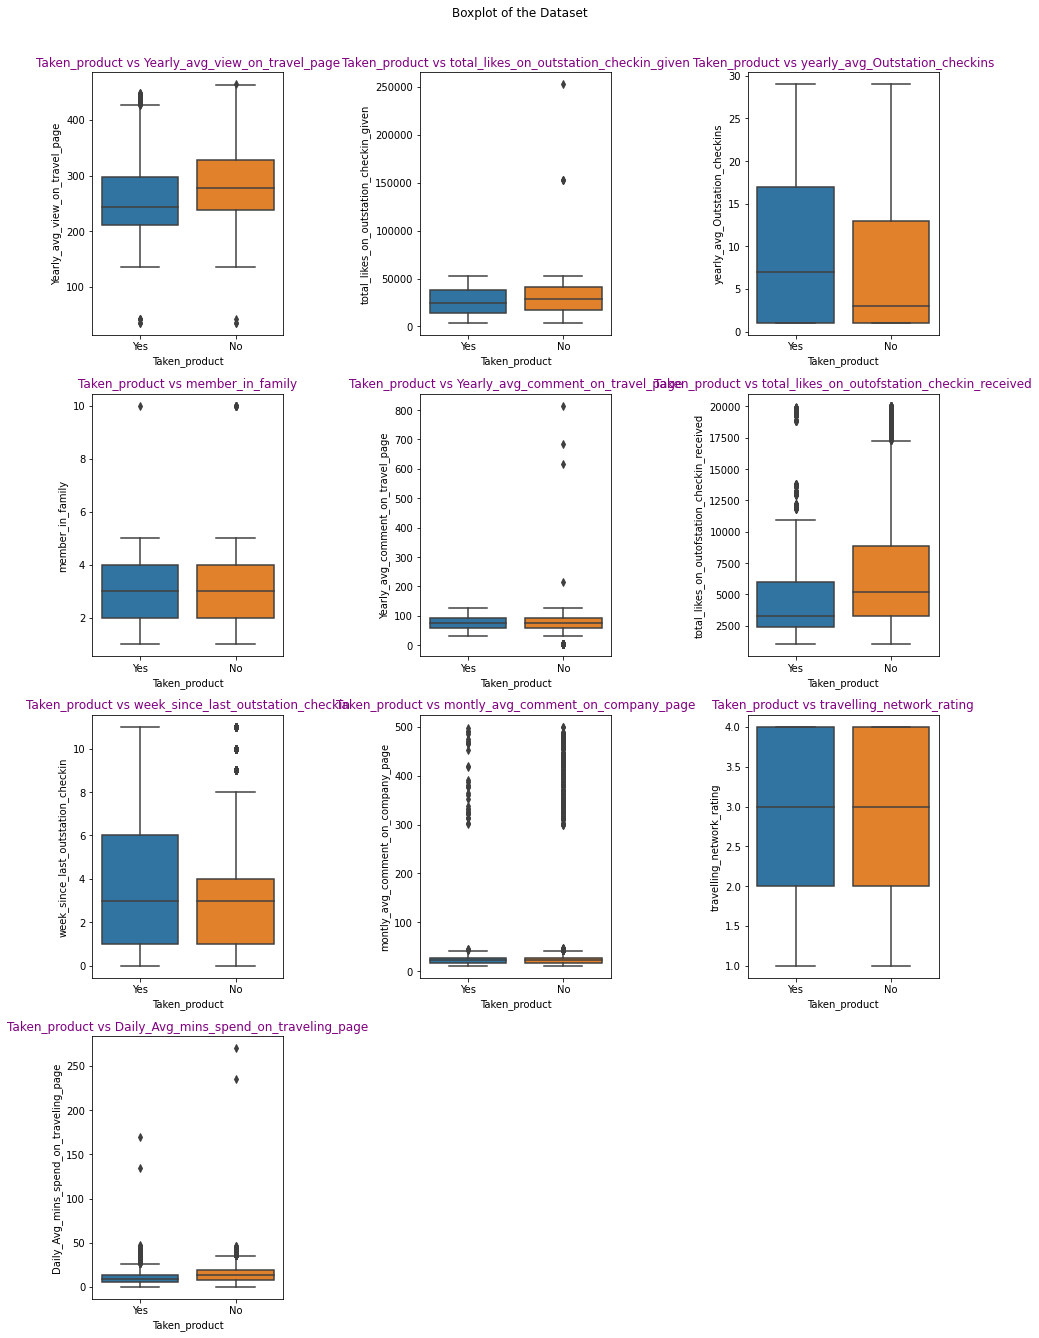

In [55]:
fig=plt.figure(figsize=(14,18))
fig.suptitle('Boxplot of the Dataset', y=1.03)
for i in range(0,df_SMTP2.select_dtypes(exclude='object').shape[1]):
    ax=fig.add_subplot(4,3,i+1)
    sns.boxplot(x=df_SMTP2['Taken_product'], y=df_SMTP2[df_SMTP2.select_dtypes(exclude='object').columns[i]])
    ax.set_title('Taken_product vs {}'.format(df_SMTP2.select_dtypes(exclude='object').columns[i]), color='purple')
    
plt.tight_layout()
plt.show()

In [56]:
# Multivariate analysis

In [57]:
# plotting pairplot between the numeric variable
df_SMTP2['Adult_flag'].dtype


dtype('O')

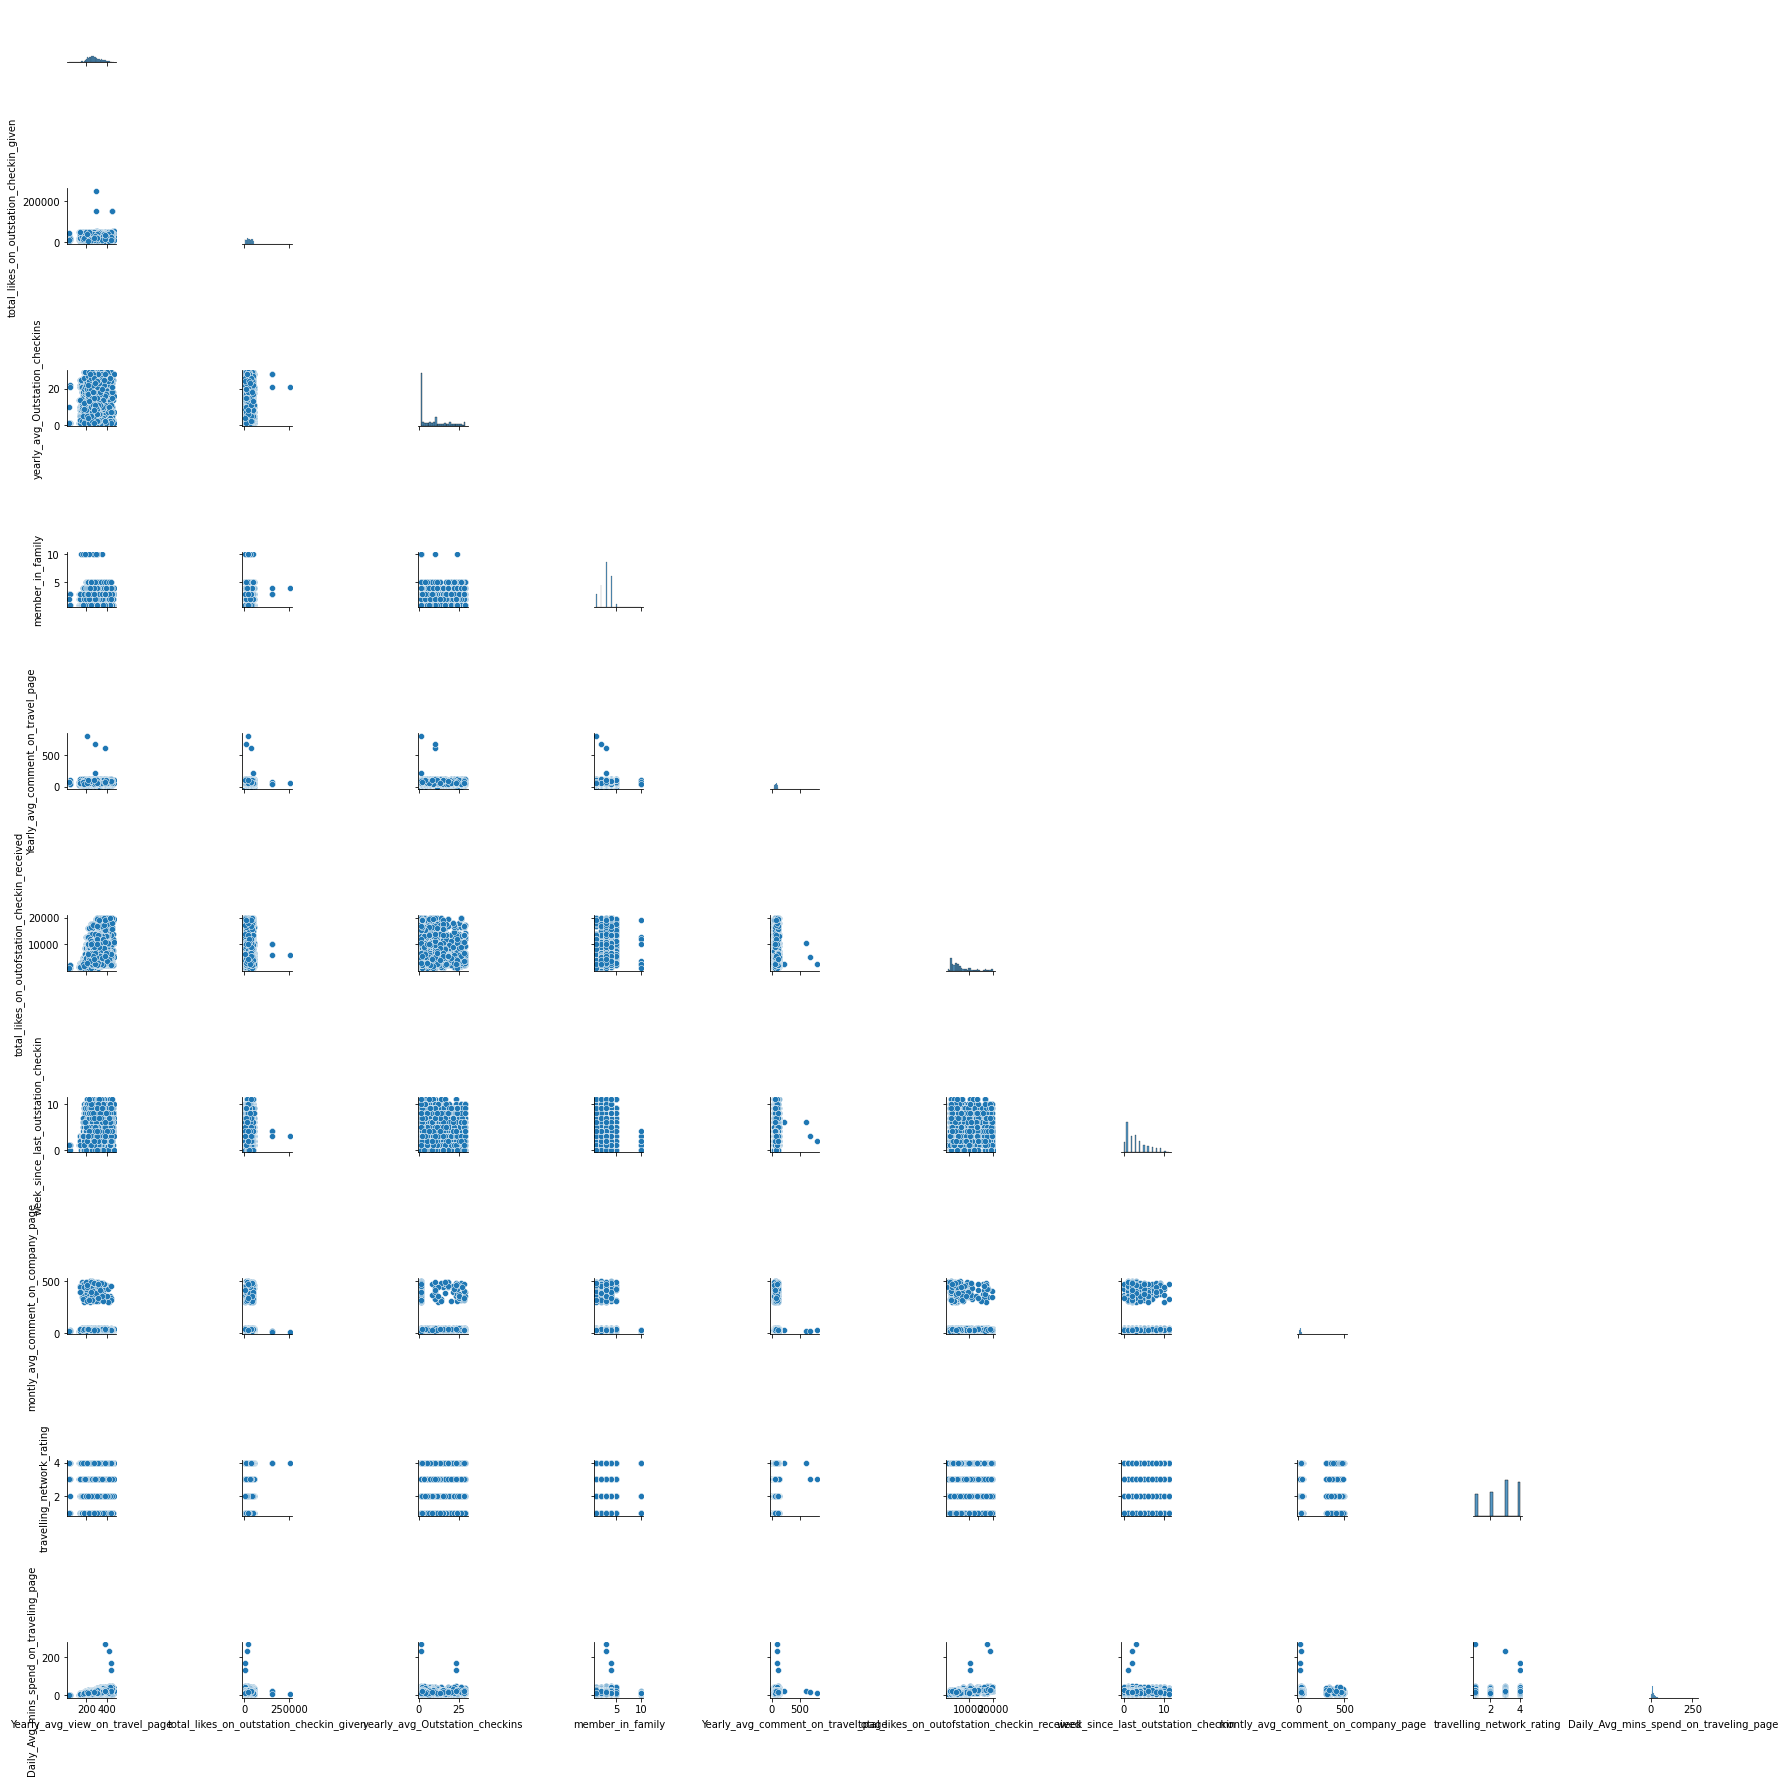

In [58]:
sns.pairplot(df_SMTP2, corner=1)


In [59]:
# plotting the correlation matrix
SMTP_corr = df_SMTP2.corr()
SMTP_corr

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Daily_Avg_mins_spend_on_traveling_page
Yearly_avg_view_on_travel_page,1.000000,0.013977,0.004912,0.187862,0.037222,0.508372,0.276371,-0.009932,0.055503,0.596602
total_likes_on_outstation_checkin_given,0.013977,1.000000,0.006908,-0.013623,0.010502,0.012135,0.035166,0.011846,0.010585,0.008792
yearly_avg_Outstation_checkins,0.004912,0.006908,1.000000,0.017558,0.046742,-0.011781,-0.033281,-0.001870,0.004106,0.006328
member_in_family,0.187862,-0.013623,0.017558,1.000000,0.006201,0.093035,0.111187,-0.008773,-0.011534,0.122344
Yearly_avg_comment_on_travel_page,0.037222,0.010502,0.046742,0.006201,1.000000,-0.016074,0.059975,0.021002,0.006666,0.060663
total_likes_on_outofstation_checkin_received,0.508372,0.012135,-0.011781,0.093035,-0.016074,1.000000,0.144058,-0.005137,0.025858,0.673410
week_since_last_outstation_checkin,0.276371,0.035166,-0.033281,0.111187,0.059975,0.144058,1.000000,0.031935,0.051027,0.249776
montly_avg_comment_on_company_page,-0.009932,0.011846,-0.001870,-0.008773,0.021002,-0.005137,0.031935,1.000000,-0.020538,0.054308
travelling_network_rating,0.055503,0.010585,0.004106,-0.011534,0.006666,0.025858,0.051027,-0.020538,1.000000,0.019657
Daily_Avg_mins_spend_on_traveling_page,0.596602,0.008792,0.006328,0.122344,0.060663,0.673410,0.249776,0.054308,0.019657,1.000000


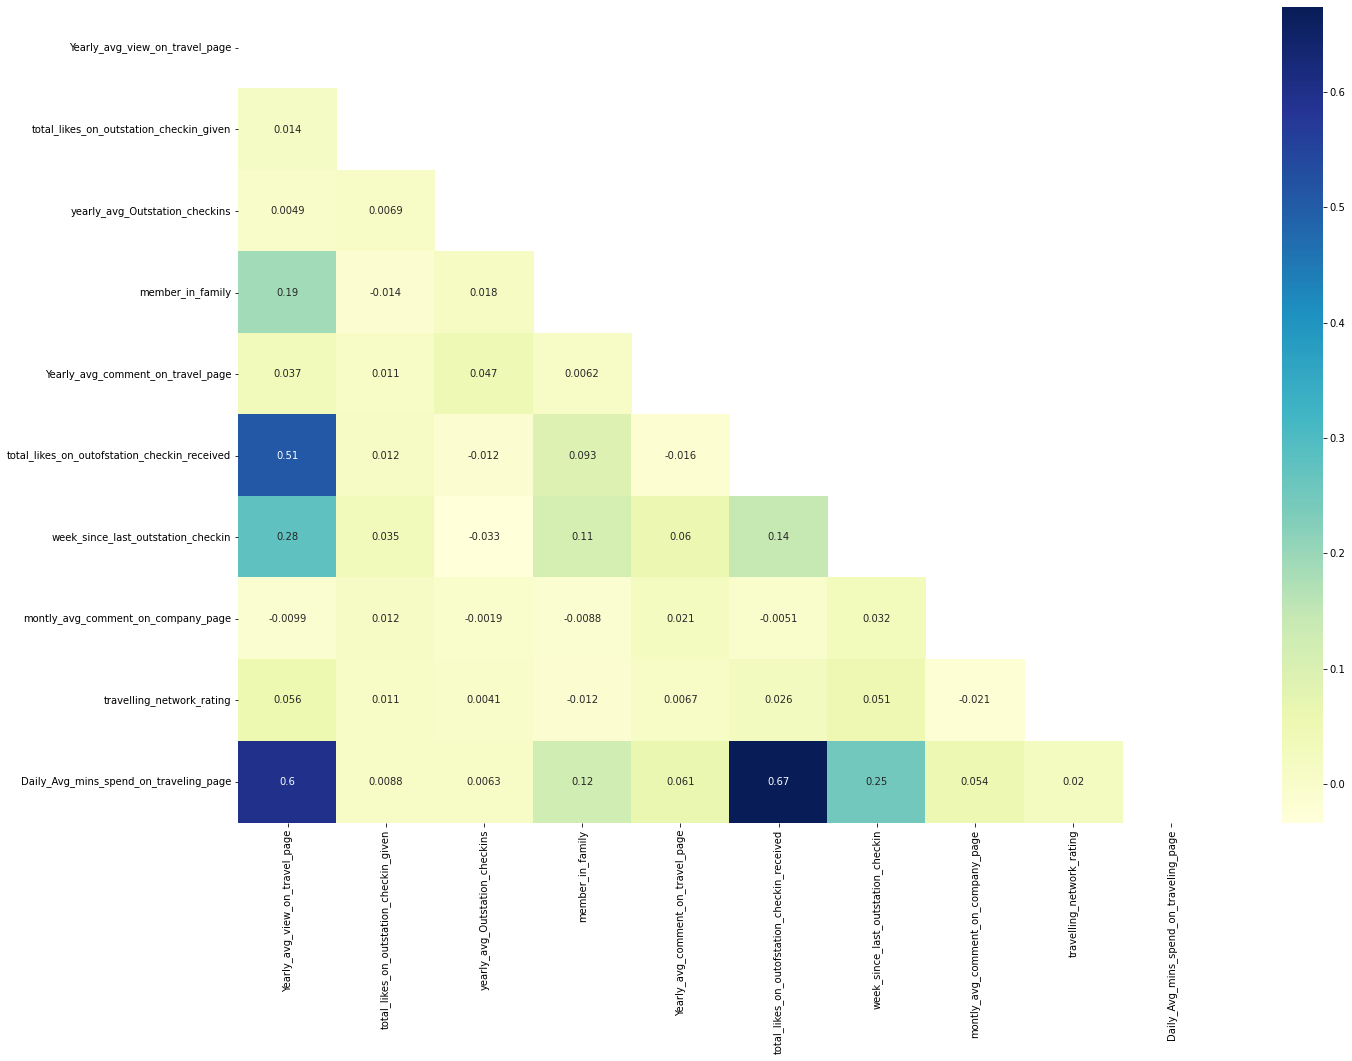

In [60]:
# Heat map
mask= np.triu(np.ones_like(df_SMTP2.corr(), dtype=np.bool)) 
plt.figure(figsize=(22, 15))
sns.heatmap(df_SMTP2.corr(), annot=True, cmap='YlGnBu', mask=mask,)

In [61]:
# Unstacking the rows and columns to view the correlated variables
SMTP_corr=pd.DataFrame(SMTP_corr.unstack().sort_values()).reset_index()

In [62]:
SMTP_corr.rename(columns={'level_0':'Var1','level_1':'Var2',0:'Corr_Coeff'}, inplace=True)

In [63]:
#Excluding the similar variables and mirror variables
SMTP_corr = SMTP_corr[SMTP_corr['Var1']!=SMTP_corr['Var2']]
SMTP_corr['Correlated Variables']=SMTP_corr.apply(lambda x: '-'.join(sorted([x['Var1'],x['Var2']])),axis=1)
SMTP_corr = SMTP_corr.drop_duplicates(['Correlated Variables'])
SMTP_corr.sort_values(by='Corr_Coeff', ascending=False).reset_index(drop=True)

,Var1,Var2,Corr_Coeff,Correlated Variables
0,total_likes_on_outofstation_checkin_received,Daily_Avg_mins_spend_on_traveling_page,0.673410,Daily_Avg_mins_spend_on_traveling_page-total_l...
1,Daily_Avg_mins_spend_on_traveling_page,Yearly_avg_view_on_travel_page,0.596602,Daily_Avg_mins_spend_on_traveling_page-Yearly_...
2,total_likes_on_outofstation_checkin_received,Yearly_avg_view_on_travel_page,0.508372,Yearly_avg_view_on_travel_page-total_likes_on_...
3,Yearly_avg_view_on_travel_page,week_since_last_outstation_checkin,0.276371,Yearly_avg_view_on_travel_page-week_since_last...
4,Daily_Avg_mins_spend_on_traveling_page,week_since_last_outstation_checkin,0.249776,Daily_Avg_mins_spend_on_traveling_page-week_si...
5,Yearly_avg_view_on_travel_page,member_in_family,0.187862,Yearly_avg_view_on_travel_page-member_in_family
6,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,0.144058,total_likes_on_outofstation_checkin_received-w...
7,Daily_Avg_mins_spend_on_traveling_page,member_in_family,0.122344,Daily_Avg_mins_spend_on_traveling_page-member_...
8,member_in_family,week_since_last_outstation_checkin,0.111187,member_in_family-week_since_last_outstation_ch...
9,member_in_family,total_likes_on_outofstation_checkin_received,0.093035,member_in_family-total_likes_on_outofstation_c...


In [64]:
# Checking the collinearity using Variance Inflation Factor

In [65]:
X = df_SMTP2.drop('Taken_product',axis=1)



In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.select_dtypes(exclude='object').values, ix) for ix in range(X.select_dtypes(exclude='object').shape[1])] 

i=0
for column in X.select_dtypes(exclude='object').columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

Yearly_avg_view_on_travel_page ---> 22.22230556920259
total_likes_on_outstation_checkin_given ---> 4.526547211797758
yearly_avg_Outstation_checkins ---> 1.88727190435004
member_in_family ---> 8.207289569425091
Yearly_avg_comment_on_travel_page ---> 8.726741002836789
total_likes_on_outofstation_checkin_received ---> 5.6036089065587085
week_since_last_outstation_checkin ---> 2.777823247223848
montly_avg_comment_on_company_page ---> 1.3437511084907523
travelling_network_rating ---> 6.452645568565428
Daily_Avg_mins_spend_on_traveling_page ---> 7.223988702148997


In [67]:
# Outlier Treatment

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [68]:
num.remove('UserID')

In [69]:
df_SMTP3 = df_SMTP2.copy()

for column in num:
    lr,ur=remove_outlier(df_SMTP3[column])
    df_SMTP3[column]=np.where(df_SMTP3[column]>ur,ur,df_SMTP3[column])
    df_SMTP3[column]=np.where(df_SMTP3[column]<lr,lr,df_SMTP3[column])

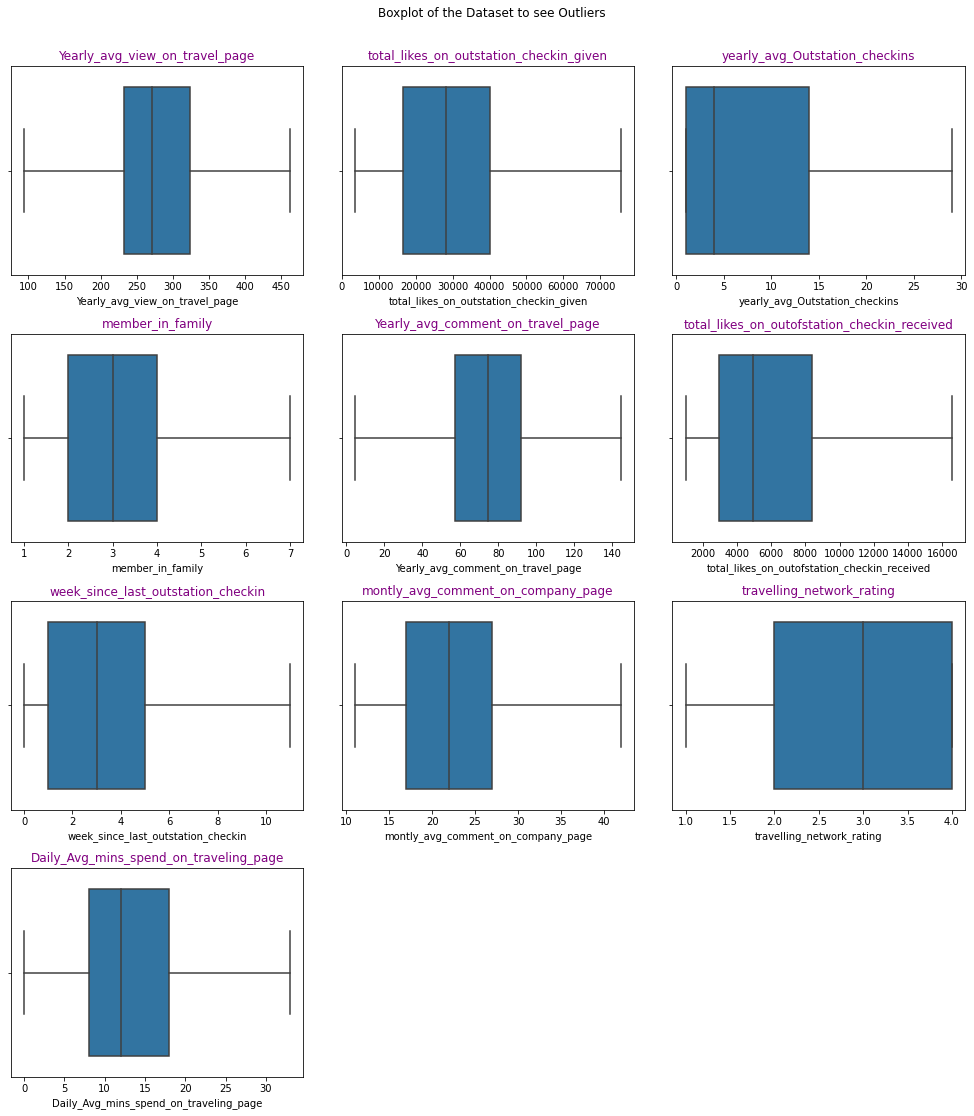

In [70]:
# Plotting Boxplot to see if there are any outlier in any of the Columns

fig=plt.figure(figsize=(14,15))
fig.suptitle('Boxplot of the Dataset to see Outliers', y=1.03)
for i in range(0,df_SMTP3.select_dtypes(exclude='object').shape[1]):
    ax=fig.add_subplot(4,3,i+1)
    sns.boxplot(df_SMTP3[df_SMTP3.select_dtypes(exclude='object').columns[i]])
    ax.set_title(df_SMTP3.select_dtypes(exclude='object').columns[i], color='purple')
    
plt.tight_layout()
plt.show()

In [71]:
# Removing Multicolllinearity by dropping 
X1 = X.drop(['Daily_Avg_mins_spend_on_traveling_page','Yearly_avg_view_on_travel_page'], axis=1)

In [72]:
# Checking the VIF
vif = [variance_inflation_factor(X1.select_dtypes(exclude='object').values, ix) for ix in range(X1.select_dtypes(exclude='object').shape[1])] 

i=0
for column in X1.select_dtypes(exclude='object').columns:
    if i < 9:
        print (column ,"--->",  vif[i])
        i = i+1

total_likes_on_outstation_checkin_given ---> 4.349457129279182
yearly_avg_Outstation_checkins ---> 1.8738170635418654
member_in_family ---> 6.9479086600897935
Yearly_avg_comment_on_travel_page ---> 7.6810283754247255
total_likes_on_outofstation_checkin_received ---> 2.905327317503826
week_since_last_outstation_checkin ---> 2.5902776327692303
montly_avg_comment_on_company_page ---> 1.335783520182233
travelling_network_rating ---> 5.89816841998562


In [73]:
df_SMTP4 = df_SMTP3.drop(['Daily_Avg_mins_spend_on_traveling_page','Yearly_avg_view_on_travel_page'], axis=1)

In [74]:
# Scaling the dataset

from scipy.stats import zscore
df_SMTP4 = df_SMTP4.select_dtypes(exclude='object').apply(zscore)
df_SMTP4.head()

,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating
0,0.746513,-0.834193,-0.892006,0.900146,-0.090842,1.833319,-1.611938,-1.584178
1,-1.317321,-0.834193,-1.863123,-0.627341,-0.289462,-0.842262,0.019795,1.191438
2,1.426098,-0.834193,-0.892006,0.807571,-0.989117,1.068868,-1.068027,-0.658973
3,1.473745,-0.834193,1.050226,-0.858778,-0.800624,-0.842262,-1.611938,0.266233
4,-0.534920,-0.834193,-1.863123,-1.599378,-0.671971,2.215545,-1.475960,1.191438


In [75]:
df_SMTP5 = df_SMTP4.join(df_SMTP3.select_dtypes(include='object'))
df_SMTP5.head()

,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Taken_product,preferred_device,preferred_location_type,following_company_page,working_flag,Adult_flag
0,0.746513,-0.834193,-0.892006,0.900146,-0.090842,1.833319,-1.611938,-1.584178,Yes,iOS and Android,Financial,Yes,No,Minor
1,-1.317321,-0.834193,-1.863123,-0.627341,-0.289462,-0.842262,0.019795,1.191438,No,iOS,Financial,No,Yes,Adult
2,1.426098,-0.834193,-0.892006,0.807571,-0.989117,1.068868,-1.068027,-0.658973,Yes,iOS and Android,Other,Yes,No,Minor
3,1.473745,-0.834193,1.050226,-0.858778,-0.800624,-0.842262,-1.611938,0.266233,No,iOS,Financial,Yes,No,Minor
4,-0.534920,-0.834193,-1.863123,-1.599378,-0.671971,2.215545,-1.475960,1.191438,No,iOS and Android,Medical,No,No,Adult


In [76]:

#df_SMTP5 is the final dataframe with Outlier treatment, Scaled and Multicollinierity removed.

In [77]:
# Splitting the dataset based on login device, Laptop and Mobile devices (all devices which are not laptop are categorized as Mobile device)

In [78]:
df_laptop = df_SMTP5 [df_SMTP5['preferred_device']=='Laptop']
df_mobile = df_SMTP5 [df_SMTP5['preferred_device']!='Laptop']


In [79]:
df_laptop.shape,df_mobile.shape

((1108, 14), (10652, 14))

In [80]:
df_laptop.head()

,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Taken_product,preferred_device,preferred_location_type,following_company_page,working_flag,Adult_flag
5881,-1.316532,-0.025537,-1.863123,-0.488478,-0.286700,-0.842262,1.379573,1.191438,No,Laptop,Beach,No,Yes,Adult
5883,1.474103,-0.603149,1.050226,-0.719916,-0.799704,-0.842262,-0.524116,0.266233,No,Laptop,Beach,Yes,No,Minor
5885,0.503911,-0.718671,-0.892006,0.437271,-0.762650,-1.224488,0.019795,0.266233,No,Laptop,Beach,No,No,Minor
5888,-1.474446,1.707297,0.079110,-1.229078,0.723658,-1.224488,1.379573,-0.658973,No,Laptop,Beach,No,Yes,Minor
5906,0.804476,0.898641,-1.863123,0.252121,-0.566562,-0.842262,1.379573,-0.658973,Yes,Laptop,Beach,Yes,Yes,Minor


In [81]:
df_mobile.head()

,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Taken_product,preferred_device,preferred_location_type,following_company_page,working_flag,Adult_flag
0,0.746513,-0.834193,-0.892006,0.900146,-0.090842,1.833319,-1.611938,-1.584178,Yes,iOS and Android,Financial,Yes,No,Minor
1,-1.317321,-0.834193,-1.863123,-0.627341,-0.289462,-0.842262,0.019795,1.191438,No,iOS,Financial,No,Yes,Adult
2,1.426098,-0.834193,-0.892006,0.807571,-0.989117,1.068868,-1.068027,-0.658973,Yes,iOS and Android,Other,Yes,No,Minor
3,1.473745,-0.834193,1.050226,-0.858778,-0.800624,-0.842262,-1.611938,0.266233,No,iOS,Financial,Yes,No,Minor
4,-0.534920,-0.834193,-1.863123,-1.599378,-0.671971,2.215545,-1.475960,1.191438,No,iOS and Android,Medical,No,No,Adult


In [82]:
df_laptop['Taken_product'].value_counts(normalize=True)

No     0.750903
Yes    0.249097
Name: Taken_product, dtype: float64

In [83]:
df_mobile['Taken_product'].value_counts(normalize=True)

No     0.847916
Yes    0.152084
Name: Taken_product, dtype: float64

In [84]:
# Balancing technique is not required as the response ratio is more than 5%

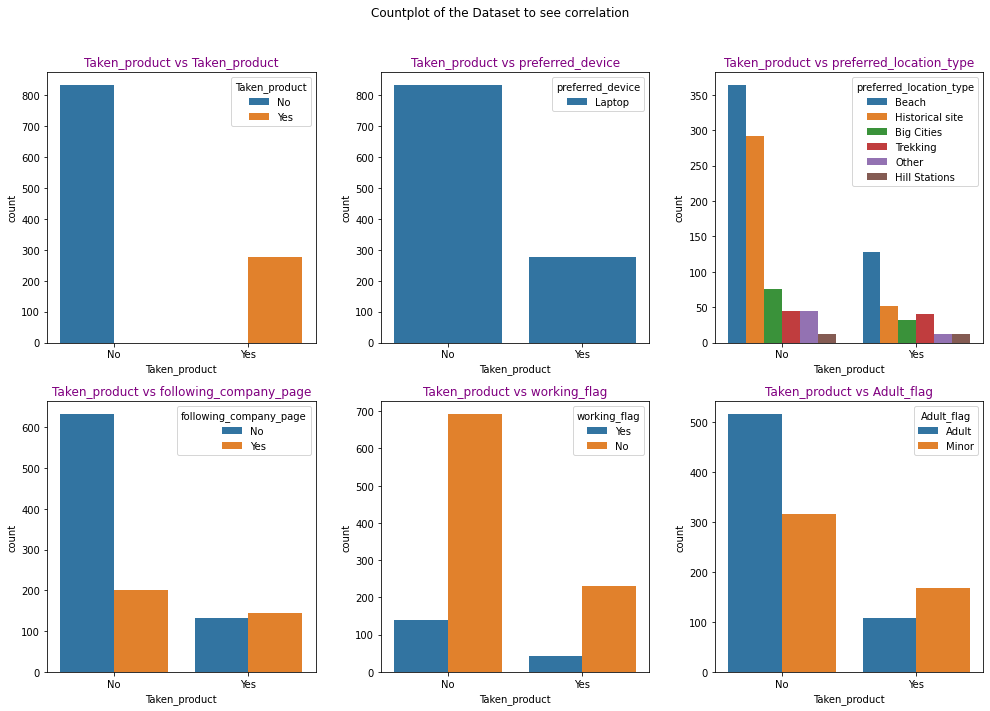

In [85]:
# Bivariate analysis on categorical variables for laptop dataset

fig=plt.figure(figsize=(14,18))
fig.suptitle('Countplot of the Dataset to see correlation', y=1.03)
for i in range(0,df_laptop.select_dtypes(include='object').shape[1]):
    ax=fig.add_subplot(4,3,i+1)
    sns.countplot(x=df_laptop['Taken_product'], hue=df_laptop[df_laptop.select_dtypes(include='object').columns[i]], data=df_laptop)
    ax.set_title('Taken_product vs {}'.format(df_laptop.select_dtypes(include='object').columns[i]), color='purple')
    
plt.tight_layout()
plt.show()

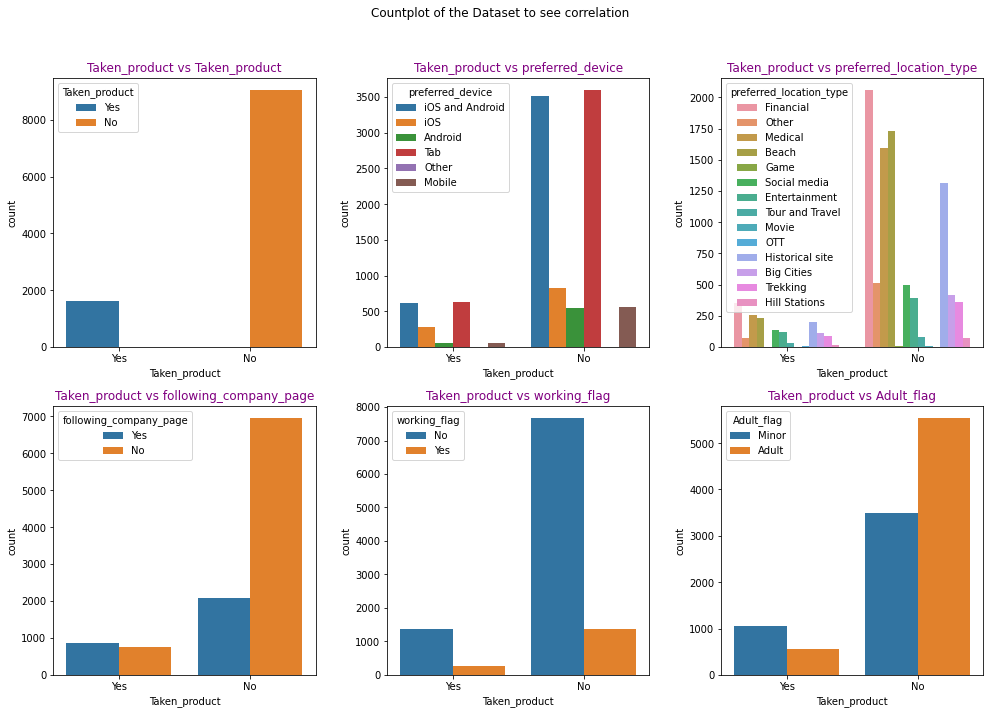

In [86]:
# Bivariate analysis on categorical variables for mobile dataset

fig=plt.figure(figsize=(14,18))
fig.suptitle('Countplot of the Dataset to see correlation', y=1.03)
for i in range(0,df_mobile.select_dtypes(include='object').shape[1]):
    ax=fig.add_subplot(4,3,i+1)
    sns.countplot(x=df_mobile['Taken_product'], hue=df_mobile[df_mobile.select_dtypes(include='object').columns[i]], data=df_mobile)
    ax.set_title('Taken_product vs {}'.format(df_mobile.select_dtypes(include='object').columns[i]), color='purple')
    
plt.tight_layout()
plt.show()

In [87]:
# Building Descriptive Model with the dataset 

device1 =  list(df_laptop.select_dtypes(['object']).columns)

device1


['Taken_product',
 'preferred_device',
 'preferred_location_type',
 'following_company_page',
 'working_flag',
 'Adult_flag']

In [88]:
del device1[0:3]

In [89]:
device1

['following_company_page', 'working_flag', 'Adult_flag']

In [90]:
# Encoding the object type variable

for a in device1:
    print('\n')
    print(f'Unique values of Variable {a} are {df_laptop[a].unique()}')
    print(f'Categorical codes of encoded variable {a} are {pd.Categorical(df_laptop[a].unique()).codes}')
    df_laptop[a]=pd.Categorical(df_laptop[a]).codes



Unique values of Variable following_company_page are ['No' 'Yes']
Categorical codes of encoded variable following_company_page are [0 1]


Unique values of Variable working_flag are ['Yes' 'No']
Categorical codes of encoded variable working_flag are [1 0]


Unique values of Variable Adult_flag are ['Adult' 'Minor']
Categorical codes of encoded variable Adult_flag are [0 1]


In [91]:
device2 =  list(df_mobile.select_dtypes(['object']).columns)

device2

['Taken_product',
 'preferred_device',
 'preferred_location_type',
 'following_company_page',
 'working_flag',
 'Adult_flag']

In [92]:
del device2[0:3]

device2

['following_company_page', 'working_flag', 'Adult_flag']

In [93]:
for a in device2:
    print('\n')
    print(f'Unique values of Variable {a} are {df_mobile[a].unique()}')
    print(f'Categorical codes of encoded variable {a} are {pd.Categorical(df_mobile[a].unique()).codes}')
    df_mobile[a]=pd.Categorical(df_mobile[a]).codes



Unique values of Variable following_company_page are ['Yes' 'No']
Categorical codes of encoded variable following_company_page are [1 0]


Unique values of Variable working_flag are ['No' 'Yes']
Categorical codes of encoded variable working_flag are [0 1]


Unique values of Variable Adult_flag are ['Minor' 'Adult']
Categorical codes of encoded variable Adult_flag are [1 0]


In [94]:
# Encoding the preferred location type variable using Weight of Evidence and Information Value method, defining a function for the same

In [95]:
def WOE_IV(var,df):
    df['Z'] = 'dummy'
    x = df.groupby([var,'Taken_product']).count().unstack()['Z']
    x['WOE'] = np.round(np.log((x['No']/x['No'].sum())/(x['Yes']/x['Yes'].sum())),3)
    iv_x = np.round(np.sum(((x['No']/x['No'].sum()) - (x['Yes']/x['Yes'].sum()))*x['WOE']),3)
    return list(x.index),list(x['WOE'].values),iv_x

In [96]:
df_laptop_WOE_IV = df_laptop.copy()
df_mobile_WOE_IV = df_mobile.copy()

In [97]:
WOE_IV('preferred_location_type',df_laptop_WOE_IV)

(['Beach',
  'Big Cities',
  'Hill Stations',
  'Historical site',
  'Other',
  'Trekking'],
 [-0.058, -0.238, -1.103, 0.622, 0.196, -1.008],
 0.235)

In [98]:
WOE_IV('preferred_location_type',df_mobile_WOE_IV)

(['Beach',
  'Big Cities',
  'Entertainment',
  'Financial',
  'Game',
  'Hill Stations',
  'Historical site',
  'Medical',
  'Movie',
  'OTT',
  'Other',
  'Social media',
  'Tour and Travel',
  'Trekking'],
 [0.296,
  -0.36,
  -0.557,
  0.04,
  0.68,
  -0.271,
  0.163,
  0.126,
  -0.332,
  -2.006,
  0.202,
  -0.45,
  -0.681,
  -0.321],
 0.078)

In [99]:
WOE_Laptop = pd.DataFrame({'Levels':WOE_IV('preferred_location_type',df_laptop_WOE_IV)[0],
                          'WOE':WOE_IV('preferred_location_type',df_laptop_WOE_IV)[1]})
WOE_Laptop.set_index('Levels',inplace=True)
WOE_Laptop.sort_values(by = 'WOE',ascending = False)

,WOE
Levels,
Historical site,0.622
Other,0.196
Beach,-0.058
Big Cities,-0.238
Trekking,-1.008
Hill Stations,-1.103


In [100]:
WOE_Mobile = pd.DataFrame({'Levels':WOE_IV('preferred_location_type',df_mobile_WOE_IV)[0],
                          'WOE':WOE_IV('preferred_location_type',df_mobile_WOE_IV)[1]})
WOE_Mobile.set_index('Levels',inplace=True)
WOE_Mobile.sort_values(by = 'WOE',ascending = False)

,WOE
Levels,
Game,0.680
Beach,0.296
Other,0.202
Historical site,0.163
Medical,0.126
Financial,0.040
Hill Stations,-0.271
Trekking,-0.321
Movie,-0.332


In [101]:
df_laptop['preferred_location_type'] = df_laptop['preferred_location_type'].map(WOE_Laptop['WOE'].T.to_dict())
df_mobile['preferred_location_type'] = df_mobile['preferred_location_type'].map(WOE_Mobile['WOE'].T.to_dict())

In [102]:
df_laptop['Taken_product'] = np.where(df_laptop['Taken_product'] == 'Yes',1,0)
df_mobile['Taken_product'] = np.where(df_mobile['Taken_product'] == 'Yes',1,0)

In [103]:
df_laptop.drop('preferred_device',axis=1,inplace=True)
df_mobile.drop('preferred_device',axis=1,inplace=True)

In [104]:
df_mobile.head(3)

,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Taken_product,preferred_location_type,following_company_page,working_flag,Adult_flag
0,0.746513,-0.834193,-0.892006,0.900146,-0.090842,1.833319,-1.611938,-1.584178,1,0.040,1,0,1
1,-1.317321,-0.834193,-1.863123,-0.627341,-0.289462,-0.842262,0.019795,1.191438,0,0.040,0,1,0
2,1.426098,-0.834193,-0.892006,0.807571,-0.989117,1.068868,-1.068027,-0.658973,1,0.202,1,0,1


In [105]:
df_laptop.head(3)

,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Taken_product,preferred_location_type,following_company_page,working_flag,Adult_flag
5881,-1.316532,-0.025537,-1.863123,-0.488478,-0.286700,-0.842262,1.379573,1.191438,0,-0.058,0,1,0
5883,1.474103,-0.603149,1.050226,-0.719916,-0.799704,-0.842262,-0.524116,0.266233,0,-0.058,1,0,1
5885,0.503911,-0.718671,-0.892006,0.437271,-0.762650,-1.224488,0.019795,0.266233,0,-0.058,0,0,1


***Descriptive Model using Logistic function -- Laptop***

In [106]:
import statsmodels.api as sm
X = df_laptop.loc[:,df_laptop.columns != 'Taken_product']
Y = df_laptop.loc[:,df_laptop.columns == 'Taken_product']
Desc_laptop_model = sm.Logit(Y,X)
result = Desc_laptop_model.fit()
coef_summary = pd.DataFrame(result.params,columns=['Coef'])
coef_summary['Pvalue'] = result.pvalues
coef_summary

Optimization terminated successfully.
         Current function value: 0.568537
         Iterations 6


,Coef,Pvalue
total_likes_on_outstation_checkin_given,-0.236397,1.148275e-03
yearly_avg_Outstation_checkins,0.200605,4.986339e-03
member_in_family,-0.102262,1.437176e-01
Yearly_avg_comment_on_travel_page,0.029739,6.801853e-01
total_likes_on_outofstation_checkin_received,-0.588909,2.085289e-12
week_since_last_outstation_checkin,0.321673,1.963030e-05
montly_avg_comment_on_company_page,-0.526428,9.973855e-09
travelling_network_rating,-0.377953,6.301969e-08
preferred_location_type,-1.175638,1.043061e-14
following_company_page,0.234726,8.899821e-02


In [107]:
# Filtering the variable with high p value which has no statistical significance

In [108]:
coef_summary[coef_summary['Pvalue']>0.05]

,Coef,Pvalue
member_in_family,-0.102262,0.143718
Yearly_avg_comment_on_travel_page,0.029739,0.680185
following_company_page,0.234726,0.088998
working_flag,-0.406684,0.071469


In [109]:
X.drop(['working_flag','member_in_family','Yearly_avg_comment_on_travel_page','following_company_page'],axis=1,inplace = True)
Desc_laptop_model = sm.Logit(Y,X)
result = Desc_laptop_model.fit()
coef_summary = pd.DataFrame(result.params,columns=['Coef'])
coef_summary['Pvalue'] = result.pvalues
coef_summary['Odds'] = np.exp(coef_summary['Coef'])
coef_summary['Probs'] = coef_summary['Odds']/(coef_summary['Odds']+1)
coef_summary

Optimization terminated successfully.
         Current function value: 0.572067
         Iterations 6


,Coef,Pvalue,Odds,Probs
total_likes_on_outstation_checkin_given,-0.227436,1.492388e-03,0.796573,0.443385
yearly_avg_Outstation_checkins,0.193004,6.290197e-03,1.212887,0.548102
total_likes_on_outofstation_checkin_received,-0.605812,6.448948e-13,0.545631,0.353015
week_since_last_outstation_checkin,0.325406,1.144016e-05,1.384593,0.580641
montly_avg_comment_on_company_page,-0.574604,5.451579e-13,0.562928,0.360175
travelling_network_rating,-0.371120,8.694787e-08,0.689961,0.408270
preferred_location_type,-1.136236,1.892247e-14,0.321025,0.243012
Adult_flag,-0.492843,8.190540e-06,0.610887,0.379224


***Descriptive Model using Logistic function -- mobile ***

In [146]:
import statsmodels.api as sm
X1 = df_mobile.loc[:,df_mobile.columns != 'Taken_product']
Y1 = df_mobile.loc[:,df_mobile.columns == 'Taken_product']
Desc_mobile_model = sm.Logit(Y1,X1)
result1 = Desc_mobile_model.fit()
coef_summary1 = pd.DataFrame(result1.params,columns=['Coef'])
coef_summary1['Pvalue'] = result1.pvalues
coef_summary1

Optimization terminated successfully.
         Current function value: 0.576199
         Iterations 6


,Coef,Pvalue
total_likes_on_outstation_checkin_given,-0.096653,9.171421e-06
yearly_avg_Outstation_checkins,0.126563,4.870539e-09
member_in_family,-0.067385,2.445328e-03
Yearly_avg_comment_on_travel_page,-0.083229,2.138577e-04
total_likes_on_outofstation_checkin_received,-0.354143,4.865196e-49
week_since_last_outstation_checkin,0.106597,1.688230e-06
montly_avg_comment_on_company_page,0.259896,1.940062e-25
travelling_network_rating,-0.026859,2.190280e-01
preferred_location_type,-1.082129,5.852236e-40
following_company_page,-0.297883,5.548623e-11


In [111]:
# Filtering the variable with high p value which has no statistical significance

In [147]:
coef_summary1[coef_summary1['Pvalue']>0.05]

,Coef,Pvalue
travelling_network_rating,-0.026859,0.219028


In [ ]:
X1.drop(['travelling_network_rating'],axis=1,inplace = True)

In [151]:




Desc_mobile_model = sm.Logit(Y1,X1)
result1 = Desc_mobile_model.fit()
coef_summary1 = pd.DataFrame(result1.params,columns=['Coef'])
coef_summary1['Pvalue'] = result1.pvalues
coef_summary1['Odds'] = np.exp(coef_summary1['Coef'])
coef_summary1['Probs'] = coef_summary1['Odds']/(coef_summary1['Odds']+1)
coef_summary1

Optimization terminated successfully.
         Current function value: 0.576270
         Iterations 6


,Coef,Pvalue,Odds,Probs
total_likes_on_outstation_checkin_given,-0.096956,8.564557e-06,0.907596,0.475780
yearly_avg_Outstation_checkins,0.126585,4.800424e-09,1.134946,0.531604
member_in_family,-0.066939,2.603510e-03,0.935252,0.483271
Yearly_avg_comment_on_travel_page,-0.083505,2.036797e-04,0.919887,0.479136
total_likes_on_outofstation_checkin_received,-0.354457,3.861056e-49,0.701555,0.412302
week_since_last_outstation_checkin,0.105581,2.074386e-06,1.111356,0.526371
montly_avg_comment_on_company_page,0.260332,1.601705e-25,1.297361,0.564718
preferred_location_type,-1.082002,5.757322e-40,0.338916,0.253127
following_company_page,-0.299182,4.496944e-11,0.741424,0.425757
working_flag,-1.606897,3.255165e-96,0.200509,0.167020


## Predictive Model of the Dataset -- Mobile

In [114]:
# Splitting the dataset into Train and Test in the ration of 70% to 30% for modelling

XM = df_mobile.loc[:,df_mobile.columns != 'Taken_product']
YM = df_mobile.loc[:,df_mobile.columns == 'Taken_product']
from sklearn.model_selection import train_test_split
XM_train,XM_test,YM_train,YM_test = train_test_split(XM,YM,test_size=0.3,random_state=1234) 

In [115]:
XM_train.shape,XM_test.shape,YM_train.shape,YM_test.shape

((7456, 12), (3196, 12), (7456, 1), (3196, 1))

### Applying Logistic Regression

In [116]:
# Applying GridSearch to find the best parameters
grid={'tol':[0.001,0.0001],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'C':[1.0,0.1,0.01],'penalty':['l2']  }

In [117]:
# Fit the Logistic Regression model
model_LR = LogisticRegression(max_iter=100,verbose=False,n_jobs=-1)

In [118]:
grid_search = GridSearchCV(estimator = model_LR, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [119]:
Class_LR=grid_search.fit(XM_train, YM_train)
warnings.filterwarnings('ignore')

In [120]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.001} 

LogisticRegression(n_jobs=-1, solver='newton-cg', tol=0.001, verbose=False)


In [121]:
best_model = grid_search.best_estimator_

In [122]:
y_train_predict_lr = best_model.predict(XM_train)
y_test_predict_lr = best_model.predict(XM_test)

In [123]:
Log_reg_Score_Train = best_model.score(XM_train, YM_train)
LogReg_Score_Test = best_model.score(XM_test, YM_test)

print('Train Accuracy: {}'.format(Log_reg_Score_Train))
print('Test Accuracy: {}'.format(LogReg_Score_Test))

Train Accuracy: 0.8689645922746781
Test Accuracy: 0.8557571964956195


### Applying Linear Discriminant Analysis

In [124]:
# Applying GridSearch to find the best parameters
grid_lda={'solver':['svd','lsqr', 'eigen'],
      'tol':[0.001,0.0001]}

In [125]:
LDA = LinearDiscriminantAnalysis()
grid_search_LDA = GridSearchCV(estimator = LDA, param_grid = grid_lda, cv = 3,n_jobs=-1,scoring='f1')

In [126]:
Class_LDA=grid_search_LDA.fit(XM_train, YM_train)
warnings.filterwarnings('ignore')

In [127]:
print(grid_search_LDA.best_params_,'\n')
print(grid_search_LDA.best_estimator_)

{'solver': 'lsqr', 'tol': 0.001} 

LinearDiscriminantAnalysis(solver='lsqr', tol=0.001)


In [128]:
best_model_LDA = grid_search_LDA.best_estimator_

In [129]:
# Predicting on Training and Test dataset

y_train_predict_lda = best_model_LDA.predict(XM_train)

y_test_predict_lda = best_model_LDA.predict(XM_test)

In [130]:
LDA_Score_Train = best_model_LDA.score(XM_train, YM_train)
LDA_Score_Test = best_model_LDA.score(XM_test, YM_test)

print('Train Accuracy: {}'.format(LDA_Score_Train))
print('Test Accuracy: {}'.format(LDA_Score_Test))

Train Accuracy: 0.8688304721030042
Test Accuracy: 0.8563829787234043


### Applying Naive Bayes Model

In [131]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(XM_train, YM_train)

GaussianNB()

In [132]:
# Predicting on Training and Test dataset
y_train_predict_NB = NB_model.predict(XM_train)
y_test_predict_NB = NB_model.predict(XM_test)

In [133]:
NB_Score_Train = NB_model.score(XM_train, YM_train)
NB_Score_Test = NB_model.score(XM_test, YM_test)


print('Train Accuracy: {}'.format(NB_Score_Train))
print('Test Accuracy: {}'.format(NB_Score_Test))

Train Accuracy: 0.8685622317596566
Test Accuracy: 0.8529411764705882


### Applying KNN Model

In [134]:
# Using grid search to check the best model parameters
from sklearn.neighbors import KNeighborsClassifier
grid_KNN={'n_neighbors':[5,9,15,19,25],
      'weights':['uniform','distance']}
KNN_model=KNeighborsClassifier()
grid_search_KNN = GridSearchCV(estimator = KNN_model, param_grid = grid_KNN, cv = 3,n_jobs=-1,scoring='f1')
Class_KNN=grid_search_KNN.fit(XM_train, YM_train)

In [135]:
print(grid_search_KNN.best_estimator_)
best_KNN_model = grid_search_KNN.best_estimator_

KNeighborsClassifier(weights='distance')


In [136]:
# Predicting on Training and Test dataset

y_train_predict_KNN = best_KNN_model.predict(XM_train)
y_test_predict_KNN = best_KNN_model.predict(XM_test)

In [137]:
KNN_Score_Train = best_KNN_model.score(XM_train, YM_train)
KNN_Score_Test = best_KNN_model.score(XM_test, YM_test)


print('Train Accuracy: {}'.format(KNN_Score_Train))
print('Test Accuracy: {}'.format(KNN_Score_Test))

Train Accuracy: 1.0
Test Accuracy: 0.9618272841051314


### Decision Tree

In [138]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(1)
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
params_DT = {'criterion':['gini','entropy'],
         'max_depth':list(range(700,901)),
         'min_samples_split':list(range(1,10)),
         'min_samples_leaf':list(range(2,10)),
         'min_impurity_decrease':list(np.random.normal(0.0001,.0005,500))}
grid_search_DT = RandomizedSearchCV(estimator = model_DT, param_distributions = params_DT, cv = 10,n_jobs=-1,verbose=2)
grid_search_DT.fit(XM_train, YM_train)
best_DT_model = grid_search_DT.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [139]:
grid_search_DT.best_params_

{'criterion': 'entropy',
 'max_depth': 820,
 'min_impurity_decrease': 0.0001254038773880145,
 'min_samples_leaf': 6,
 'min_samples_split': 9}

In [140]:
# Grid search parameter

gridsearch_param_DT = {'criterion':['gini'],
         'max_depth':[800,816,830,850],
         'min_samples_split':[5,9,14,20],
         'min_samples_leaf':[2,4,10,15,18],
         'min_impurity_decrease':[0.0008,0.0009,0.0010,0.0012]}

In [141]:
gridsearch_DT1 = GridSearchCV(estimator = model_DT, param_grid = gridsearch_param_DT, cv = 10,n_jobs=-1,verbose=2)
gridsearch_DT1.fit(XM_train, YM_train)
best_DT_model1 = gridsearch_DT1.best_estimator_

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


In [142]:
gridsearch_DT1.best_params_

{'criterion': 'gini',
 'max_depth': 816,
 'min_impurity_decrease': 0.0008,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [143]:
# Predicting on Training and Test dataset

y_train_predict_DT = best_DT_model1.predict(XM_train)
y_test_predict_DT = best_DT_model1.predict(XM_test)

In [144]:
DT_Score_Train = best_DT_model1.score(XM_train, YM_train)
DT_Score_Test = best_DT_model1.score(XM_test, YM_test)


print('Train Accuracy: {}'.format(DT_Score_Train))
print('Test Accuracy: {}'.format(DT_Score_Test))

Train Accuracy: 0.9287821888412017
Test Accuracy: 0.8986232790988736


### Random Forest

In [145]:

from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()
params_RF = {'criterion':['gini','entropy'],
         'n_estimators':list(range(801,1002,2)),
         'min_samples_leaf':list(range(1,5)),
         'max_features':list(range(12,16,1)),
         'max_samples':list(np.arange(0.1,0.5,0.01))}
grid_search_RF = RandomizedSearchCV(estimator = model_RF, param_distributions = params_RF, cv = 3,n_jobs=-1,verbose=2)
grid_search_RF.fit(XM_train, YM_train)
best_RF_model = grid_search_RF.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: ignored

In [ ]:
grid_search_RF.best_params_

In [ ]:
# Grid search parameter

gridsearch_param_RF = {
         'n_estimators': [900,929,950,970],
 'min_samples_leaf': [1,3,5,8],
 'max_samples': [0.34999999999999987,0.32,0.37,0.40],
 'max_features': [10,12,14,16]}

In [ ]:
gridsearch_RF1 = GridSearchCV(estimator = model_RF, param_grid = gridsearch_param_RF, cv = 3,n_jobs=-1,verbose=2)
gridsearch_RF1.fit(XM_train, YM_train)
best_RF_model1 = gridsearch_RF1.best_estimator_

In [ ]:
# Predicting on Training and Test dataset

y_train_predict_RF = best_RF_model1.predict(XM_train)
y_test_predict_RF = best_RF_model1.predict(XM_test)

In [ ]:
RF_Score_Train = best_RF_model1.score(XM_train, YM_train)
RF_Score_Test = best_RF_model1.score(XM_test, YM_test)


print('Train Accuracy: {}'.format(RF_Score_Train))
print('Test Accuracy: {}'.format(RF_Score_Test))

In [ ]:
np.arange(0,12,1)

### Bagging with previous Decision Tree Model

In [ ]:
from sklearn.ensemble import BaggingClassifier
DTB_model = BaggingClassifier(base_estimator = best_DT_model1,random_state=1234)
params_DTB = {'n_estimators':list(range(101,902,300)),
              'max_features': [8,12,14]
              }
grid_search_DTB = RandomizedSearchCV(estimator = DTB_model, param_distributions = params_DTB, cv = 2,n_jobs=-1,verbose=2)
grid_search_DTB.fit(XM_train, YM_train)
best_DTB_model = grid_search_DTB.best_estimator_

In [ ]:
# Predicting on Training and Test dataset

y_train_predict_DTB = best_DTB_model.predict(XM_train)
y_test_predict_DTB = best_DTB_model.predict(XM_test)

In [ ]:
DTB_Score_Train = best_DTB_model.score(XM_train, YM_train)
DTB_Score_Test = best_DTB_model.score(XM_test, YM_test)


print('Train Accuracy: {}'.format(DTB_Score_Train))
print('Test Accuracy: {}'.format(DTB_Score_Test))

### Applying Ada boosting method

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(XM_train, YM_train)

In [ ]:
# Predicting on Training and Test dataset

y_train_predict_AB = abcl.predict(XM_train)
y_test_predict_AB = abcl.predict(XM_test)

In [ ]:
AB_Score_Train = abcl.score(XM_train, YM_train)
AB_Score_Test = abcl.score(XM_test, YM_test)


print('Train Accuracy: {}'.format(AB_Score_Train))
print('Test Accuracy: {}'.format(AB_Score_Train))

### Applying Gradient boosting method

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 10,random_state=1)
gbcl = gbcl.fit(XM_train, YM_train)

In [ ]:
# Predicting on Training and Test dataset

y_train_predict_GB = gbcl.predict(XM_train)
y_test_predict_GB = gbcl.predict(XM_test)

In [ ]:
GB_Score_Train = gbcl.score(XM_train, YM_train)
GB_Score_Test = gbcl.score(XM_test, YM_test)


print('Train Accuracy: {}'.format(GB_Score_Train))
print('Test Accuracy: {}'.format(GB_Score_Test))

### Ensemble Modelling using all the above methods

In [ ]:
from sklearn.ensemble import VotingClassifier
PredictiveModel_list = [('KNN',KNN_model),('DT',best_DT_model),('RF',best_RF_model),('DT_Bagging',best_DTB_model)]
VOT_model = VotingClassifier(estimators = PredictiveModel_list,voting = 'soft',weights = [4,6,5,7])
VOT_model.fit(XM_train, YM_train)

In [ ]:
# Predicting on Training and Test dataset

y_train_predict_VOT = VOT_model.predict(XM_train)
y_test_predict_VOT = VOT_model.predict(XM_test)

In [ ]:
VOT_Score_Train = VOT_model.score(XM_train, YM_train)
VOT_Score_Test = VOT_model.score(XM_test, YM_test)


print('Train Accuracy: {}'.format(VOT_Score_Train))
print('Test Accuracy: {}'.format(VOT_Score_Test))

#### Stacking Model

In [ ]:
from sklearn.ensemble import StackingClassifier
stacker = LogisticRegression()
STA_model = StackingClassifier(estimators=PredictiveModel_list,final_estimator = stacker,n_jobs=-1)
STA_model.fit(XM_train, YM_train)

In [ ]:
# Predicting on Training and Test dataset

y_train_predict_STA = STA_model.predict(XM_train)
y_test_predict_STA = STA_model.predict(XM_test)

In [ ]:
STA_Score_Train = STA_model.score(XM_train, YM_train)
STA_Score_Test = STA_model.score(XM_test, YM_test)


print('Train Accuracy: {}'.format(STA_Score_Train))
print('Test Accuracy: {}'.format(STA_Score_Test))

### Performance Metrics

In [ ]:
# Accuracy Scores

Accuracy_Score = pd.DataFrame(data=[[Log_reg_Score_Train,LogReg_Score_Test],[LDA_Score_Train,LDA_Score_Test],[NB_Score_Train,NB_Score_Test],[KNN_Score_Train,KNN_Score_Test],[DT_Score_Train,DT_Score_Test],[RF_Score_Train,RF_Score_Test],[DTB_Score_Train,DTB_Score_Test],[AB_Score_Train,AB_Score_Test],[GB_Score_Train,GB_Score_Test],[VOT_Score_Train,VOT_Score_Test],[STA_Score_Train,STA_Score_Test]],columns=['Train_Score','Test_Score'], index=['Log_Reg','LDA','NB','KNN','DT','RF','DTB','AB','GB','VOT','STA'])

In [ ]:
Accuracy_Score 

In [ ]:
Accuracy_Score.plot(kind = 'bar', figsize=(10,12))
plt.xticks(rotation=0)
plt.legend(loc='lower left')

In [ ]:
# Confusion_Matrix

In [ ]:
# Logistic Regression Train and Test
confusion_matrix(YM_train, y_train_predict_lr)
sns.heatmap(confusion_matrix(YM_train, y_train_predict_lr),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using Log Regression Model', pad =15)
plt.show()

In [ ]:
confusion_matrix(YM_test, y_test_predict_lr)
sns.heatmap(confusion_matrix(YM_test, y_test_predict_lr),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using Log Regression Model', pad =15)
plt.show()

In [ ]:
# LDA Train and Test
confusion_matrix(YM_train, y_train_predict_lda)
sns.heatmap(confusion_matrix(YM_train, y_train_predict_lda),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using LDA Model', pad =15)
plt.show()

In [ ]:
confusion_matrix(YM_test, y_test_predict_lda)
sns.heatmap(confusion_matrix(YM_test, y_test_predict_lda),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using LDA Model', pad =15)
plt.show()

In [ ]:
# NB Train and Test
confusion_matrix(YM_train, y_train_predict_NB)
sns.heatmap(confusion_matrix(YM_train, y_train_predict_NB),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using NB Model', pad =15)
plt.show()

In [ ]:
confusion_matrix(YM_test, y_test_predict_NB)
sns.heatmap(confusion_matrix(YM_test, y_test_predict_NB),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using NB Model', pad =15)
plt.show()

In [ ]:
# KNN Train and Test
confusion_matrix(YM_train, y_train_predict_KNN)
sns.heatmap(confusion_matrix(YM_train, y_train_predict_KNN),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using KNN Model', pad =15)
plt.show()

In [ ]:
confusion_matrix(YM_test, y_test_predict_KNN)
sns.heatmap(confusion_matrix(YM_test, y_test_predict_KNN),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using KNN Model', pad =15)
plt.show()

In [ ]:
# DT Train and Test
confusion_matrix(YM_train, y_train_predict_DT)
sns.heatmap(confusion_matrix(YM_train, y_train_predict_DT),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using DT Model', pad =15)
plt.show()

In [ ]:
confusion_matrix(YM_test, y_test_predict_DT)
sns.heatmap(confusion_matrix(YM_test, y_test_predict_DT),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using DT Model', pad =15)
plt.show()

In [ ]:
# RF Train and Test
confusion_matrix(YM_train, y_train_predict_RF)
sns.heatmap(confusion_matrix(YM_train, y_train_predict_RF),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using RF Model', pad =15)
plt.show()

In [ ]:
confusion_matrix(YM_test, y_test_predict_RF)
sns.heatmap(confusion_matrix(YM_test, y_test_predict_RF),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using RF Model', pad =15)
plt.show()

In [ ]:
# DTB Train and Test
confusion_matrix(YM_train, y_train_predict_DTB)
sns.heatmap(confusion_matrix(YM_train, y_train_predict_DTB),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using DTB Model', pad =15)
plt.show()

In [ ]:
confusion_matrix(YM_test, y_test_predict_DTB)
sns.heatmap(confusion_matrix(YM_test, y_test_predict_DTB),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using DTB Model', pad =15)
plt.show()

In [ ]:
# AB Train and Test
confusion_matrix(YM_train, y_train_predict_AB)
sns.heatmap(confusion_matrix(YM_train, y_train_predict_AB),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using AB Model', pad =15)
plt.show()

In [ ]:
confusion_matrix(YM_test, y_test_predict_AB)
sns.heatmap(confusion_matrix(YM_test, y_test_predict_AB),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using AB Model', pad =15)
plt.show()

In [ ]:
# GB Train and Test
confusion_matrix(YM_train, y_train_predict_GB)
sns.heatmap(confusion_matrix(YM_train, y_train_predict_GB),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using GB Model', pad =15)
plt.show()

In [ ]:
confusion_matrix(YM_test, y_test_predict_GB)
sns.heatmap(confusion_matrix(YM_test, y_test_predict_GB),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using GB Model', pad =15)
plt.show()

In [ ]:
# VOT Train and Test
confusion_matrix(YM_train, y_train_predict_VOT)
sns.heatmap(confusion_matrix(YM_train, y_train_predict_VOT),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using VOT Model', pad =15)
plt.show()

In [ ]:
confusion_matrix(YM_test, y_test_predict_VOT)
sns.heatmap(confusion_matrix(YM_test, y_test_predict_VOT),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using VOT Model', pad =15)
plt.show()

In [ ]:
# STA Train and Test
confusion_matrix(YM_train, y_train_predict_STA)
sns.heatmap(confusion_matrix(YM_train, y_train_predict_STA),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using STA Model', pad =15)
plt.show()

In [ ]:
confusion_matrix(YM_test, y_test_predict_STA)
sns.heatmap(confusion_matrix(YM_test, y_test_predict_STA),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using STA Model', pad =15)
plt.show()

In [ ]:
# Classification Report 

In [ ]:
# Classification Report of TRAIN and TEST data for Log Regression model
print(classification_report(YM_train, y_train_predict_lr))

In [ ]:
print(classification_report(YM_test, y_test_predict_lr))

In [ ]:
# Classification Report of TRAIN and TEST data for LDA model
print(classification_report(YM_train, y_train_predict_lda))

In [ ]:
print(classification_report(YM_test, y_test_predict_lda))

In [ ]:
# Classification Report of TRAIN and TEST data for NB model
print(classification_report(YM_train, y_train_predict_NB))

In [ ]:
print(classification_report(YM_test, y_test_predict_NB))

In [ ]:
# Classification Report of TRAIN and TEST data for KNN model
print(classification_report(YM_train, y_train_predict_KNN))

In [ ]:
print(classification_report(YM_test, y_test_predict_KNN))

In [ ]:
# Classification Report of TRAIN and TEST data for DT model
print(classification_report(YM_train, y_train_predict_DT))

In [ ]:
print(classification_report(YM_test, y_test_predict_DT))

In [ ]:
# Classification Report of TRAIN and TEST data for RF model
print(classification_report(YM_train, y_train_predict_RF))

In [ ]:
print(classification_report(YM_test, y_test_predict_RF))

In [ ]:
# Classification Report of TRAIN and TEST data for DTB model
print(classification_report(YM_train, y_train_predict_DTB))

In [ ]:
print(classification_report(YM_test, y_test_predict_DTB))

In [ ]:
# Classification Report of TRAIN and TEST data for AB model
print(classification_report(YM_train, y_train_predict_AB))

In [ ]:
print(classification_report(YM_test, y_test_predict_AB))

In [ ]:
# Classification Report of TRAIN and TEST data for GB model
print(classification_report(YM_train, y_train_predict_GB))

In [ ]:
print(classification_report(YM_test, y_test_predict_GB))

In [ ]:
# Classification Report of TRAIN and TEST data for VOT model
print(classification_report(YM_train, y_train_predict_VOT))

In [ ]:
print(classification_report(YM_test, y_test_predict_VOT))

In [ ]:
# Classification Report of TRAIN and TEST data for STA model
print(classification_report(YM_train, y_train_predict_STA))

In [ ]:
print(classification_report(YM_test, y_test_predict_STA))

In [ ]:
# AUC-ROC curve of Train and Test data

In [ ]:
# Logistic Regression - Train
# predict probabilities
probs = best_model.predict_proba(XM_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_lr = roc_auc_score(YM_train, probs)
print('AUC: %.3f' % auc_train_lr)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(YM_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
# Logistic Regression - Test
probs = best_model.predict_proba(XM_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_lr = roc_auc_score(YM_test, probs)
print('AUC: %.3f' % auc_test_lr)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(YM_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
# LDA - Train
# predict probabilities
probs = best_model_LDA.predict_proba(XM_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_lda = roc_auc_score(YM_train, probs)
print('AUC: %.3f' % auc_train_lda)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(YM_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
# LDA - Test
probs = best_model_LDA.predict_proba(XM_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_lda = roc_auc_score(YM_test, probs)
print('AUC: %.3f' % auc_test_lda)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(YM_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
# NB - Train
# predict probabilities
probs = NB_model.predict_proba(XM_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_NB = roc_auc_score(YM_train, probs)
print('AUC: %.3f' % auc_train_NB)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(YM_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
# NB - Test
probs = NB_model.predict_proba(XM_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_NB = roc_auc_score(YM_test, probs)
print('AUC: %.3f' % auc_test_NB)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(YM_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
# KNN - Train
# predict probabilities
probs = best_KNN_model.predict_proba(XM_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_KNN = roc_auc_score(YM_train, probs)
print('AUC: %.3f' % auc_train_KNN)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(YM_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
# KNN - Test
probs = best_KNN_model.predict_proba(XM_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_KNN = roc_auc_score(YM_test, probs)
print('AUC: %.3f' % auc_test_KNN)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(YM_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
# DT - Train
# predict probabilities
probs = best_DT_model1.predict_proba(XM_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_DT = roc_auc_score(YM_train, probs)
print('AUC: %.3f' % auc_train_DT)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(YM_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
# DT - Test
probs = best_DT_model1.predict_proba(XM_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_DT = roc_auc_score(YM_test, probs)
print('AUC: %.3f' % auc_test_DT)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(YM_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
# RF - Train
# predict probabilities
probs = best_RF_model1.predict_proba(XM_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_RF = roc_auc_score(YM_train, probs)
print('AUC: %.3f' % auc_train_RF)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(YM_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
# RF- Test
probs = best_RF_model1.predict_proba(XM_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_RF = roc_auc_score(YM_test, probs)
print('AUC: %.3f' % auc_test_RF)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(YM_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
# DTB - Train
# predict probabilities
probs = best_DTB_model.predict_proba(XM_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_DTB = roc_auc_score(YM_train, probs)
print('AUC: %.3f' % auc_train_DTB)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(YM_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
# DTB- Test
probs = best_DTB_model.predict_proba(XM_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_DTB = roc_auc_score(YM_test, probs)
print('AUC: %.3f' % auc_test_DTB)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(YM_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
# AB- Train
# predict probabilities
probs = abcl.predict_proba(XM_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_AB = roc_auc_score(YM_train, probs)
print('AUC: %.3f' % auc_train_AB)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(YM_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
# AB- Test
probs = abcl.predict_proba(XM_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_AB = roc_auc_score(YM_test, probs)
print('AUC: %.3f' % auc_test_AB)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(YM_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
# GB- Train
# predict probabilities
probs = gbcl.predict_proba(XM_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_GB = roc_auc_score(YM_train, probs)
print('AUC: %.3f' % auc_train_GB)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(YM_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
# GB- Test
probs = gbcl.predict_proba(XM_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_GB = roc_auc_score(YM_test, probs)
print('AUC: %.3f' % auc_test_GB)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(YM_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
# VOT- Train
# predict probabilities
probs = VOT_model.predict_proba(XM_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_VOT = roc_auc_score(YM_train, probs)
print('AUC: %.3f' % auc_train_VOT)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(YM_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
# VOT- Test
probs = VOT_model.predict_proba(XM_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_VOT = roc_auc_score(YM_test, probs)
print('AUC: %.3f' % auc_test_VOT)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(YM_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
# STA- Train
# predict probabilities
probs = STA_model.predict_proba(XM_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_STA = roc_auc_score(YM_train, probs)
print('AUC: %.3f' % auc_train_STA)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(YM_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
# STA- Test
probs = STA_model.predict_proba(XM_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_STA = roc_auc_score(YM_test, probs)
print('AUC: %.3f' % auc_test_STA)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(YM_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
# Extracting the Accuracy, precision, Recall, F1 Score, AUC-ROC Score for Test and Train Data

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

In [ ]:
# Extracting for Train Data

precision_Train_LogReg,recall_Train_LogReg,fscore_Train_LogReg,support_Train_LogReg =score(YM_train, y_train_predict_lr,average='macro')
precision_Train_LDA,recall_Train_LDA,fscore_Train_LDA,support_Train_LDA =score(YM_train, y_train_predict_lda,average='macro')
precision_Train_NB,recall_Train_NB,fscore_Train_NB,support_Train_NB =score(YM_train, y_train_predict_NB,average='macro')
precision_Train_KNN,recall_Train_KNN,fscore_Train_KNN,support_Train_KNN =score(YM_train, y_train_predict_KNN,average='macro')
precision_Train_DT,recall_Train_DT,fscore_Train_DT,support_Train_DT =score(YM_train, y_train_predict_DT,average='macro')
precision_Train_RF,recall_Train_RF,fscore_Train_RF,support_Train_RF =score(YM_train, y_train_predict_RF,average='macro')
precision_Train_DTB,recall_Train_DTB,fscore_Train_DTB,support_Train_DTBB =score(YM_train, y_train_predict_DTBB, average='macro')
precision_Train_AB,recall_Train_AB,fscore_Train_AB,support_Train_AB =score(YM_train, y_train_predict_AB, average='macro')
precision_Train_GB,recall_Train_GB,fscore_Train_GB,support_Train_GB =score(YM_train, y_train_predict_GB, average='macro')
precision_Train_VOT,recall_Train_VOT,fscore_Train_VOT,support_Train_VOT =score(YM_train, y_train_predict_VOT, average='macro')
precision_Train_STA,recall_Train_STA,fscore_Train_STA,support_Train_STA =score(YM_train, y_train_predict_STA, average='macro')

In [ ]:
# Creating DataFrame of Classification Report using all models for the Train datset
index = ['Log_Regression','LDA','NB','KNN','DecisionTree','RandomForest','DecisionTree_Bagging','Ada-Boosting','Grad-Boosting','Ensemble Voting','Stacking']
column = ['Precision_Train','Recall_Train','fscore_Train','Accuracy_Train', 'AUC-ROC_Score_Train']
Class_Report_Train = pd.DataFrame(data = [[precision_Train_LogReg,recall_Train_LogReg,fscore_Train_LogReg,Log_reg_Score_Train,auc_train_lr],
                                                      [precision_Train_LDA,recall_Train_LDA,fscore_Train_LDA,LDA_Score_Train,auc_train_lda],
                                         [precision_Train_NB,recall_Train_NB,fscore_Train_NB,NB_Score_Train,auc_train_NB],
                                         [precision_Train_KNN,recall_Train_KNN,fscore_Train_KNN,KNN_Score_Train,auc_train_KNN],
                                         [precision_Train_DT,recall_Train_DT,fscore_Train_DT, DT_Score_Train,auc_train_DT],
                                         [precision_Train_RF,recall_Train_RF,fscore_Train_RF,RF_Score_Train,auc_train_RF],
                                         [precision_Train_DTB,recall_Train_DTB,fscore_Train_DTB,DTB_Score_Train,auc_train_DTB],
                                         [precision_Train_AB,recall_Train_AB,fscore_Train_AB,AB_Score_Train,auc_train_AB],
                                         [precision_Train_GB,recall_Train_GB,fscore_Train_GB,GB_Score_Train,auc_train_GB],
                                         [precision_Train_VOT,recall_Train_VOT,fscore_Train_VOT,VOT_Score_Train,auc_train_VOT],
                                         [precision_Train_STA,recall_Train_STA,fscore_Train_STA,STA_Score_Train,auc_train_STA]]
                                                      , columns = column, index= index)

In [ ]:
Class_Report_Train.index.rename('Models',inplace=True)
Class_Report_Train.reset_index(inplace=True)
round(Class_Report_Train,2)

In [ ]:

# Visualizing the model performance
fig,axes = plt.subplots(3,2,figsize=(20,10))
plt.subplots_adjust(hspace=1.3)

cols = list(Class_Report_Train.columns)[1:]
for i,j in zip(cols,axes.flatten()):
    sns.barplot(x='Models',y=i,data=Class_Report_Train.sort_values(by = i,ascending=False),ax=j).tick_params(axis='x', rotation=70)
    
    

In [ ]:
# Extracting for Test Data

In [ ]:
precision_Test_LogReg,recall_Test_LogReg,fscore_Test_LogReg,support_Test_LogReg =score(YM_test, y_test_predict_lr,average='macro')
precision_Test_LDA,recall_Test_LDA,fscore_Test_LDA,support_Test_LDA =score(YM_test, y_test_predict_lda,average='macro')
precision_Test_NB,recall_Test_NB,fscore_Test_NB,support_Test_NB =score(YM_test, y_test_predict_NB,average='macro')
precision_Test_KNN,recall_Test_KNN,fscore_Test_KNN,support_Test_KNN =score(YM_test, y_test_predict_KNN,average='macro')
precision_Test_DT,recall_Test_DT,fscore_Test_DT,support_Test_DT =score(YM_test, y_test_predict_DT,average='macro')
precision_Test_RF,recall_Test_RF,fscore_Test_RF,support_Test_RF =score(YM_test, y_test_predict_RF,average='macro')
precision_Test_DTB,recall_Test_DTB,fscore_Test_DTB,support_Test_DTB =score(YM_test, y_test_predict_DTB, average='macro')
precision_Test_AB,recall_Test_AB,fscore_Test_AB,support_Test_AB =score(YM_test, y_test_predict_AB, average='macro')
precision_Test_GB,recall_Test_GB,fscore_Test_GB,support_Test_GB =score(YM_test, y_test_predict_GB, average='macro')
precision_Test_VOT,recall_Test_VOT,fscore_Test_VOT,support_Test_VOT =score(YM_test, y_test_predict_VOT, average='macro')
precision_Test_STA,recall_Test_STA,fscore_Test_STA,support_Test_STA =score(YM_test, y_test_predict_STA, average='macro')


In [ ]:
# Creating DataFrame of Classification Report using all models for the Test datset
index = ['Log_Regression','LDA','NB','KNN','DecisionTree','RandomForest','DecisionTree_Bagging','Ada-Boosting','Grad-Boosting','Ensemble Voting','Stacking']
column = ['Precision_Test','Recall_Test','fscore_Test','Accuracy_Test', 'AUC-ROC_Score_Test']
Class_Report_Test = pd.DataFrame(data = [[precision_Test_LogReg,recall_Test_LogReg,fscore_Test_LogReg,LogReg_Score_Test,auc_test_lr],
                                                      [precision_Test_LDA,recall_Test_LDA,fscore_Test_LDA,LDA_Score_Test,auc_test_lda],
                                         [precision_Test_NB,recall_Test_NB,fscore_Test_NB,NB_Score_Test,auc_test_NB],
                                         [precision_Test_KNN,recall_Test_KNN,fscore_Test_KNN,KNN_Score_Test,auc_test_KNN],
                                         [precision_Test_DT,recall_Test_DT,fscore_Test_DT, DT_Score_Test,auc_test_DT],
                                         [precision_Test_RF,recall_Test_RF,fscore_Test_RF,RF_Score_Test,auc_test_RF],
                                         [precision_Test_DTB,recall_Test_DTB,fscore_Test_DTB,DTB_Score_Test,auc_test_DTB],
                                         [precision_Test_AB,recall_Test_AB,fscore_Test_AB,AB_Score_Test,auc_test_AB],
                                         [precision_Test_GB,recall_Test_GB,fscore_Test_GB,GB_Score_Test,auc_test_GB],
                                         [precision_Test_VOT,recall_Test_VOT,fscore_Test_VOT,VOT_Score_Test,auc_test_VOT],
                                         [precision_Test_STA,recall_Test_STA,fscore_Test_STA,STA_Score_Test,auc_test_STA]]
                                                      , columns = column, index= index)


In [ ]:
Class_Report_Test.index.rename('Models',inplace=True)
Class_Report_Test.reset_index(inplace=True)
round(Class_Report_Test,2)

In [ ]:
list(Class_Report_Test['Models'].unique())

In [ ]:

# Visualizing the model performance
fig,axes = plt.subplots(3,2,figsize=(20,10))
plt.subplots_adjust(hspace=1.3)
cols = list(Class_Report_Test.columns)[1:]
for i,j in zip(cols,axes.flatten()):
    sns.barplot(x='Models',y=i,data=Class_Report_Test.sort_values(by = i,ascending=False),ax=j).tick_params(axis='x', rotation=70)
 

    